In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


import seaborn as sns

Let's examine employeement, employement, fertility and crime data. 

In [2]:
# Load all dataframes and fix data types where needed
employement = pd.read_csv('employment_in_thousands.csv').dropna()
employement.drop(columns=[f'Unnamed: {i}' for i in range(2,60,2)], inplace=True)
employement = employement.rename(
    columns={
        'Unnamed: 0': 'Sector'
    }
)
employement[employement.columns[1:]] = employement[employement.columns[1:]].astype(float)

unemployement = pd.read_csv('greece-unemployment-rate(1).csv')
unemployement['Date'] = pd.to_datetime(unemployement['Date']).dt.year

fertility = pd.read_csv('fertility.csv')
fertility['Date'] = pd.to_datetime(fertility['Date']).dt.year.astype(int)

# Indexes of wages dataset
# Ι. Not seasonally adjusted data and not adjusted for the number of the working days
# ΙΙ. Seasonally adjusted data but not adjusted for the number of the working days
# ΙΙΙ. Not seasonally adjusted data but adjusted for the number of the working days

# Base Year: 2020=100.0
# More info in wages_paper.pdf included in the project

wages = pd.read_csv('wages_clean.csv', index_col=0)
wages['Year'] = wages['Year'].astype(int)

crime_data = pd.read_csv('crime_data.csv', index_col=0)
crime_rate = pd.read_csv('Greece_Crime_Rate_Statistics.csv')

Let's begin with employement data. The categories need further aggregation to be analysed with ease. A mapping into discrete groups is the followingQ:

In [3]:
category_mapping = {
    'Agriculture, Forestry, and Fishing': [
        'Crop and animal production, hunting and related service activities',
        'Forestry and logging',
        'Fishing and aquaculture'
    ],
    'Mining and Quarrying': [
        'Mining and quarrying'
    ],
    'Manufacturing': [
        'Manufacture of food products, beverages and tobacco products',
        'Manufacture of textiles, wearing apparel, leather and related products',
        'Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials',
        'Manufacture of paper and paper products',
        'Printing and reproduction of recorded media',
        'Manufacture of coke and refined petroleum products',
        'Manufacture of chemicals and chemical products',
        'Manufacture of basic pharmaceutical products and pharmaceutical preparations',
        'Manufacture of rubber and plastic products',
        'Manufacture of other non-metallic mineral products',
        'Manufacture of basic metals',
        'Manufacture of fabricated metal products, except machinery and equipment',
        'Manufacture of computer, electronic and optical products',
        'Manufacture of electrical equipment',
        'Manufacture of machinery and equipment n.e.c.',
        'Manufacture of motor vehicles, trailers and semi-trailers',
        'Manufacture of other transport equipment',
        'Manufacture of furniture',
        'Repair and installation of machinery and equipment'
    ],
    'Utilities': [
        'Electricity, gas, steam and air conditioning supply',
        'Water collection, treatment and supply'
    ],
    'Construction': [
        'Construction'
    ],
    'Trade and Transport': [
        'Wholesale and retail trade and repair of motor vehicles and motorcycles',
        'Wholesale trade, except of motor vehicles and motorcycles',
        'Retail trade, except of motor vehicles and motorcycles',
        'Land transport and transport via pipelines',
        'Water transport',
        'Air transport',
        'Warehousing and support activities for transportation',
        'Postal and courier activities'
    ],
    'Accommodation and Food Services': [
        'Accomodation and food and beverage service activities'
    ],
    'Information and Communication': [
        'Publishing activities',
        'Motion picture, video and television programme production, sound recording and music publishing activities. Broadcasting and programming activities',
        'Telecommunications',
        'Computer programming, consultancy and related activities;information service activities'
    ],
    'Financial and Real Estate Activities': [
        'Financial service activities, except insurance and pension funding',
        'Insurance, reinsurance and pension funding, except compulsory social security',
        'Activities auxiliary to financial services and insurance activities',
        'Real estate activities'
    ],
    'Professional, Scientific, and Technical Activities': [
        'Legal and accounting activities, activities of head offices; management consultancy activities',
        'Architecture and engineering activities',
        'Scientific research and development',
        'Advertising and market research',
        'Other professional, scientific, technical and veterinary activities'
    ],
    'Administrative and Support Services': [
        'Rental and leasing activities',
        'Employment activities',
        'Travel agency, tour operator and other reservation service activities',
        'Security and investigation activities; services to buildings and landscape activities; office administrative, office support and other business support'
    ],
    'Public Services': [
        'Public administration and defence',
        'Education',
        'Human health activities',
        'Social work activities'
    ],
    'Arts, Entertainment, and Recreation': [
        'Creative, arts and entertainment activities.\nLibraries, archives, museums and other cultural activities\nGambling and betting activities',
        'Sports activities and amusement and recreation activities',
        'Activities of membership organizations'
    ],
    'Other Services': [
        'Repair of computers and personal and household goods',
        'Other personal service activities',
        'Activities of households as employers of domestic personnel. Undifferentiated goods- and services-producing activities of private households for own use',
        'Activities of extraterritorial organizations and bodies'
    ],
    'TOTAL': [
        'TOTAL'
    ]
    
}

In [4]:
# Reverse the mapping to create a lookup dictionary
lookup = {activity: category for category, activities in category_mapping.items() for activity in activities}

In [5]:
# Map the original categories to broad categories
employement['Broad Category'] = employement['Sector'].map(lookup)

# Group by the broad categories and sum the values
employement_group = employement.groupby('Broad Category').sum().drop(columns='Sector', axis=1)

#  Keep the simplified dataset for any future use
employement_group.to_csv('aggregated_employement_Data.csv')

employement_group

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Broad Category,,,,,,,,,,,,,,,,,,,,,
Accommodation and Food Services,282.953,283.775,290.813,301.900,303.614,311.909,316.273,322.420,326.704,330.899,...,448.089,445.284,522.776,538.709,603.084,654.179,549.658,640.829,688.847,696.774
Administrative and Support Services,70.101,66.972,66.793,76.711,74.548,73.747,80.570,88.674,90.454,101.007,...,121.769,119.541,131.307,132.640,136.340,142.484,134.931,148.519,161.594,164.032
"Agriculture, Forestry, and Fishing",767.528,755.338,727.592,726.916,728.893,698.457,648.569,637.918,621.412,551.546,...,530.276,511.749,499.829,503.293,507.274,498.653,481.101,504.551,507.778,518.220
"Arts, Entertainment, and Recreation",64.448,63.275,60.948,68.702,63.814,63.428,65.468,74.746,77.183,73.620,...,104.760,95.691,98.803,99.349,108.496,116.642,122.523,126.738,128.206,123.058
Construction,237.472,237.078,236.473,259.089,255.039,261.921,266.388,276.251,299.463,303.645,...,203.985,195.160,197.090,190.508,193.462,192.420,193.329,181.892,188.379,193.324
Financial and Real Estate Activities,97.441,90.909,98.834,103.866,103.210,110.712,107.531,105.870,110.449,116.346,...,100.437,103.774,103.244,99.122,101.702,101.509,104.343,106.651,108.585,110.634
Information and Communication,67.657,69.154,70.613,77.167,75.503,76.798,82.874,97.021,93.729,96.998,...,94.108,89.210,89.853,89.367,100.578,103.766,105.335,112.560,117.138,117.598
Manufacturing,437.249,438.156,424.776,436.035,431.801,423.795,442.818,445.264,435.992,435.661,...,345.750,323.153,338.153,333.225,355.136,359.300,359.194,387.413,397.638,407.805
Mining and Quarrying,15.022,15.386,14.722,14.653,13.081,14.139,14.724,12.866,13.953,13.893,...,11.152,10.261,9.346,10.201,9.980,9.018,8.067,8.820,8.969,9.360


In [6]:
def plot_category(data, broad_category):
    
    total_data = data.loc[broad_category, :]

    plt.figure(figsize=(15, 12))
    plt.plot(total_data.index, total_data.values, marker='o')

    plt.title(f'{broad_category} Workforce Over Time', fontsize=25, pad=20)
    plt.xticks(total_data.index, fontsize=16, rotation=45)
    plt.xlabel('Year', fontsize=20)

    plt.yticks(fontsize=16)
    plt.ylabel('Workforce (Thousands)', fontsize=20)

    plt.axvline(x='2020', color='red', linestyle='--', label='2020')
    plt.legend(fontsize=14)

    plt.grid(True)
    plt.tight_layout()

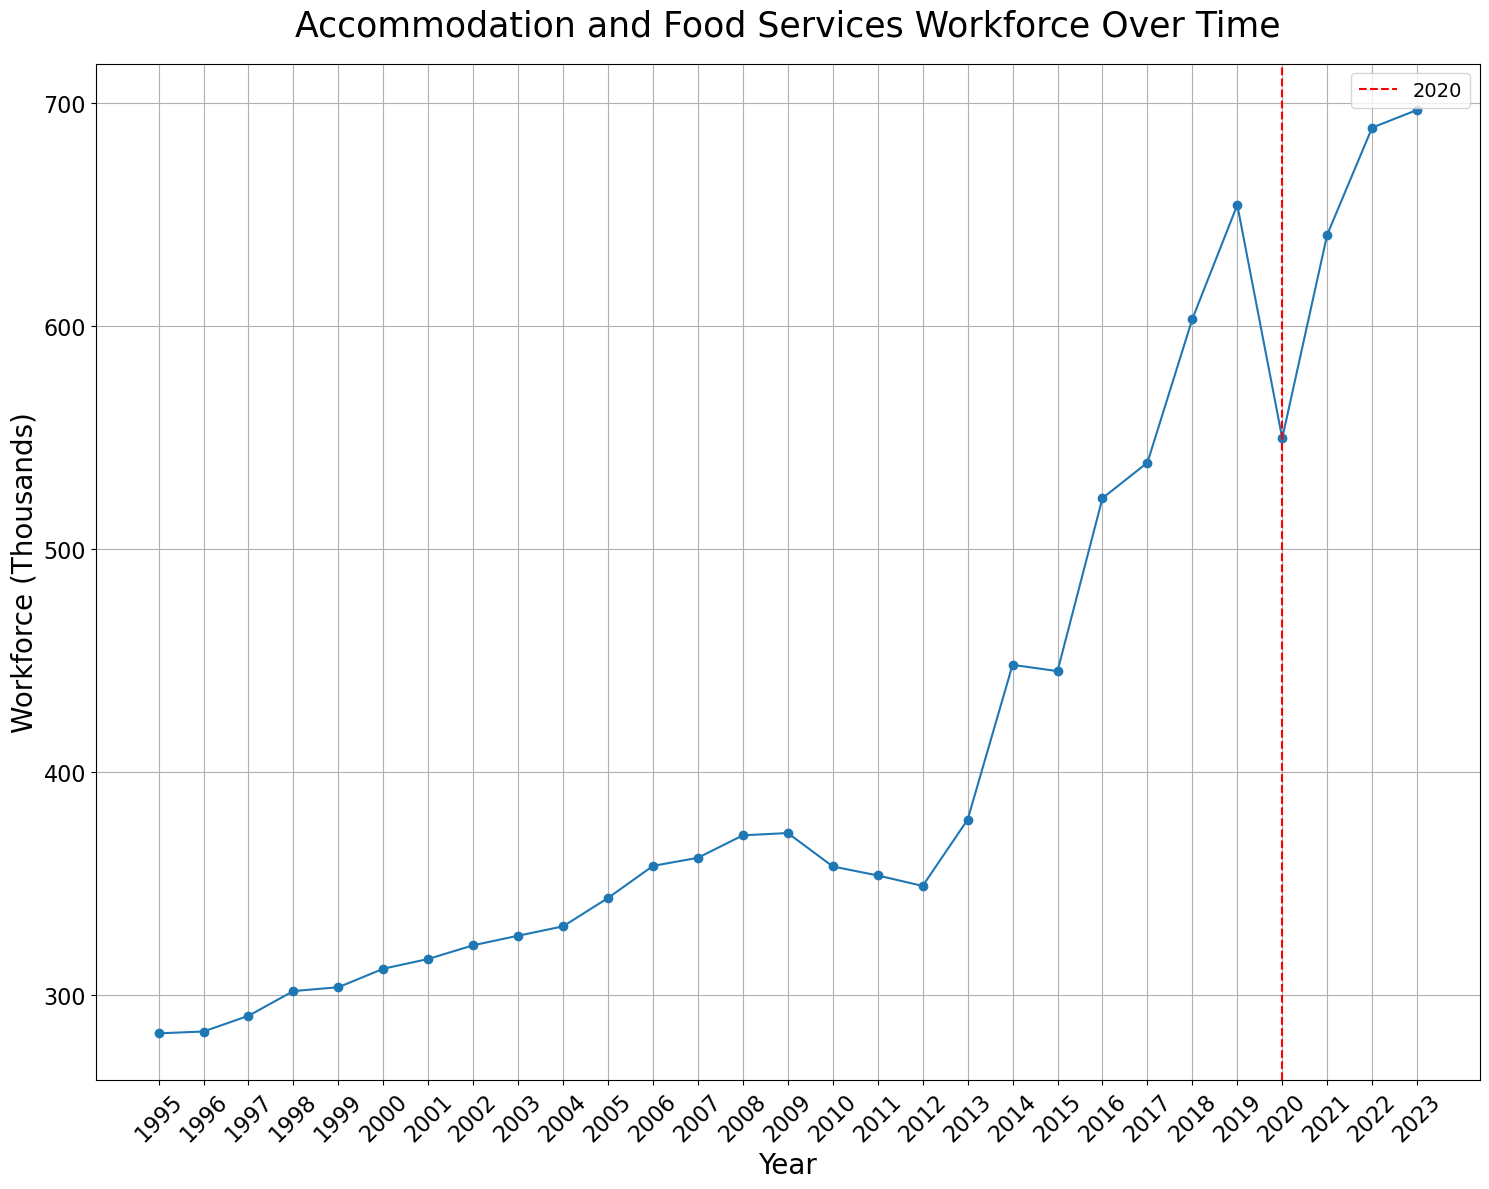

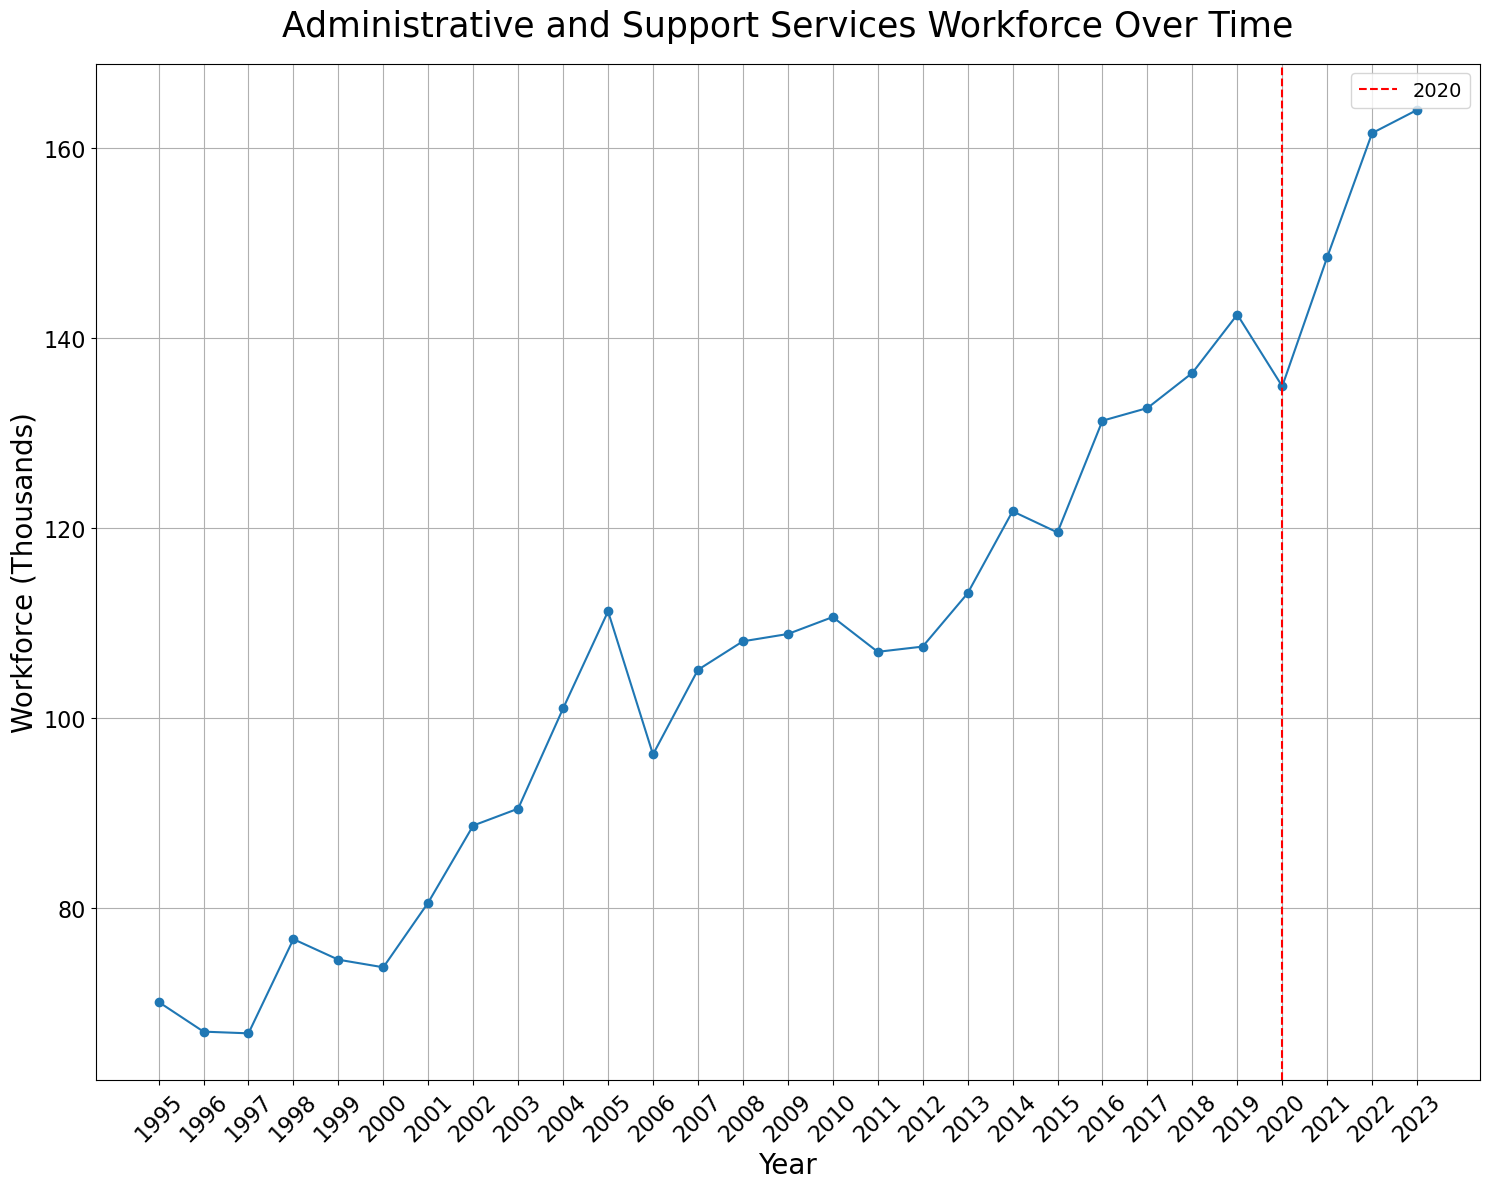

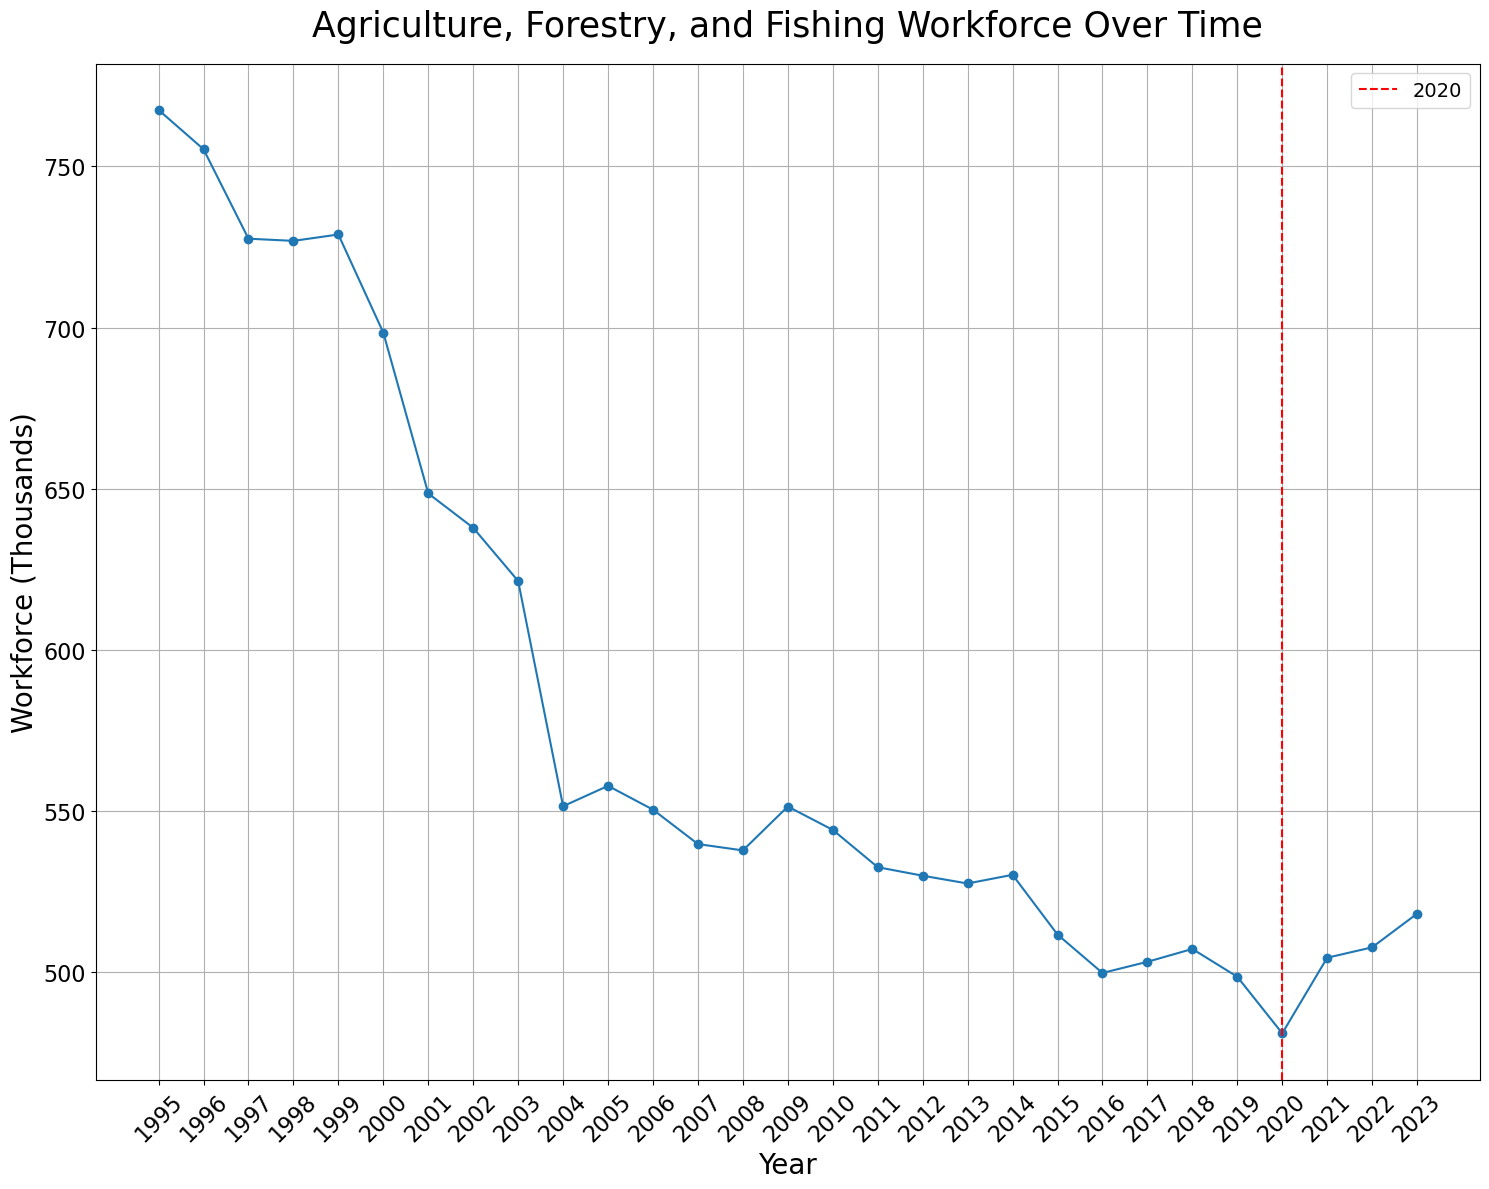

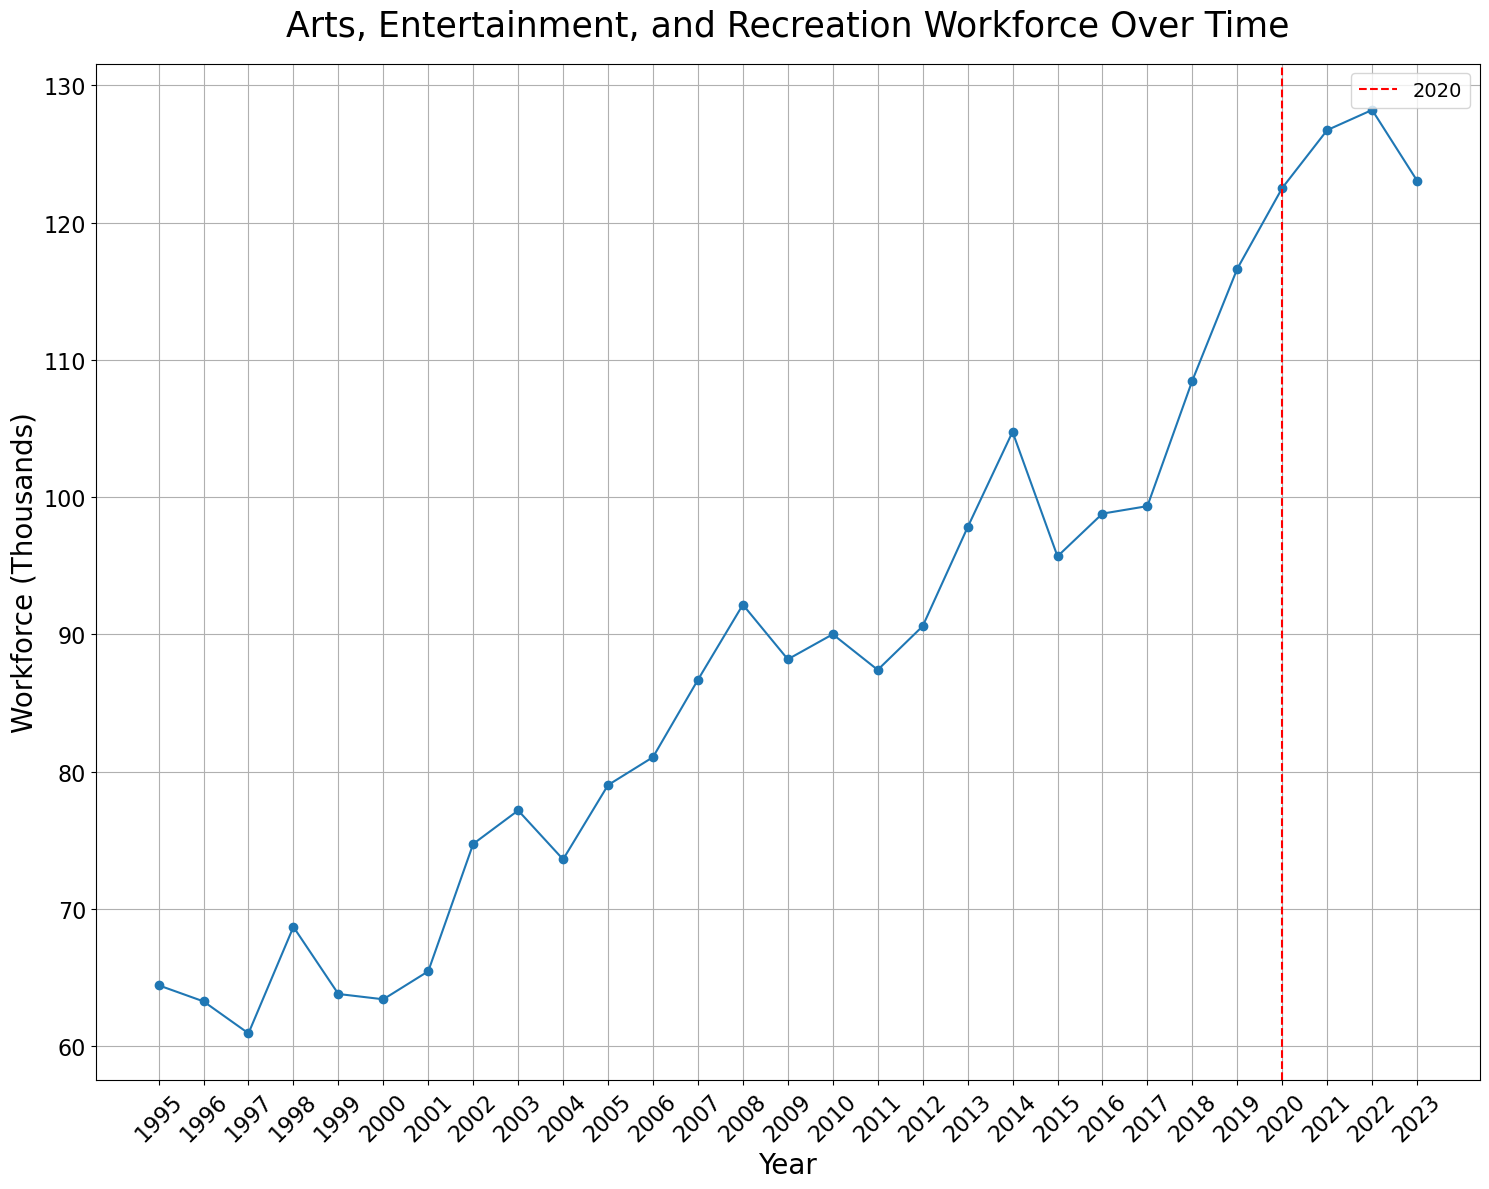

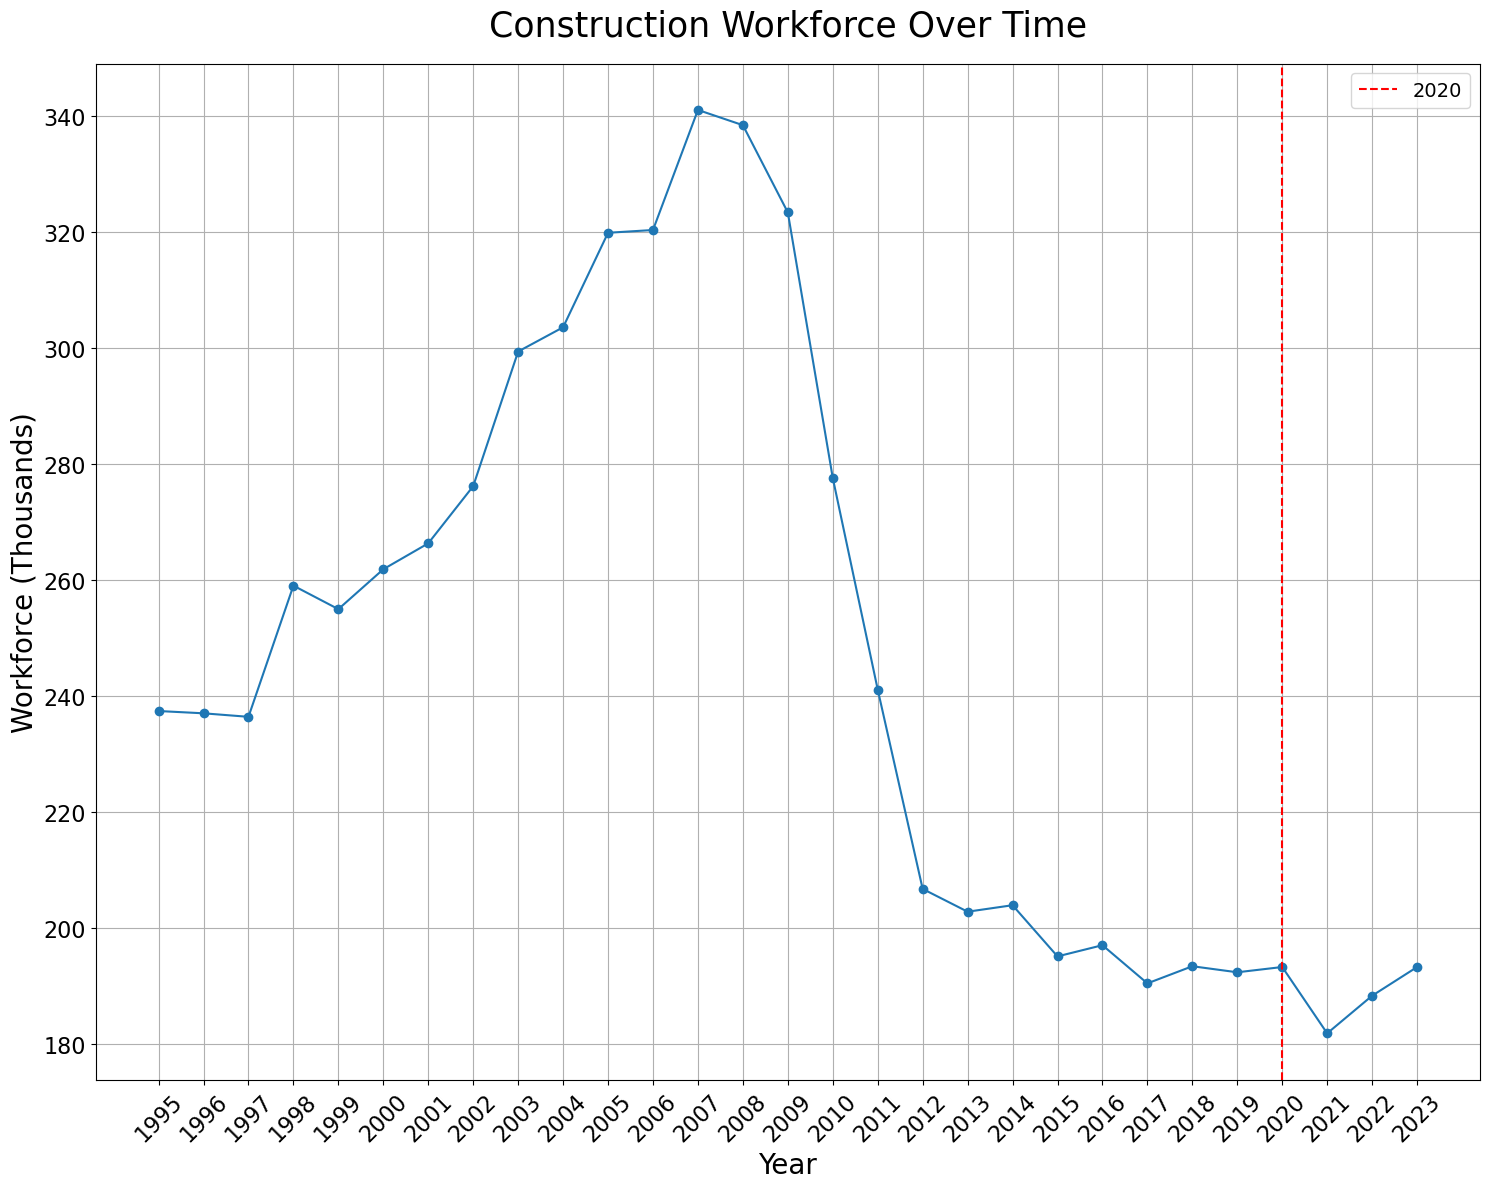

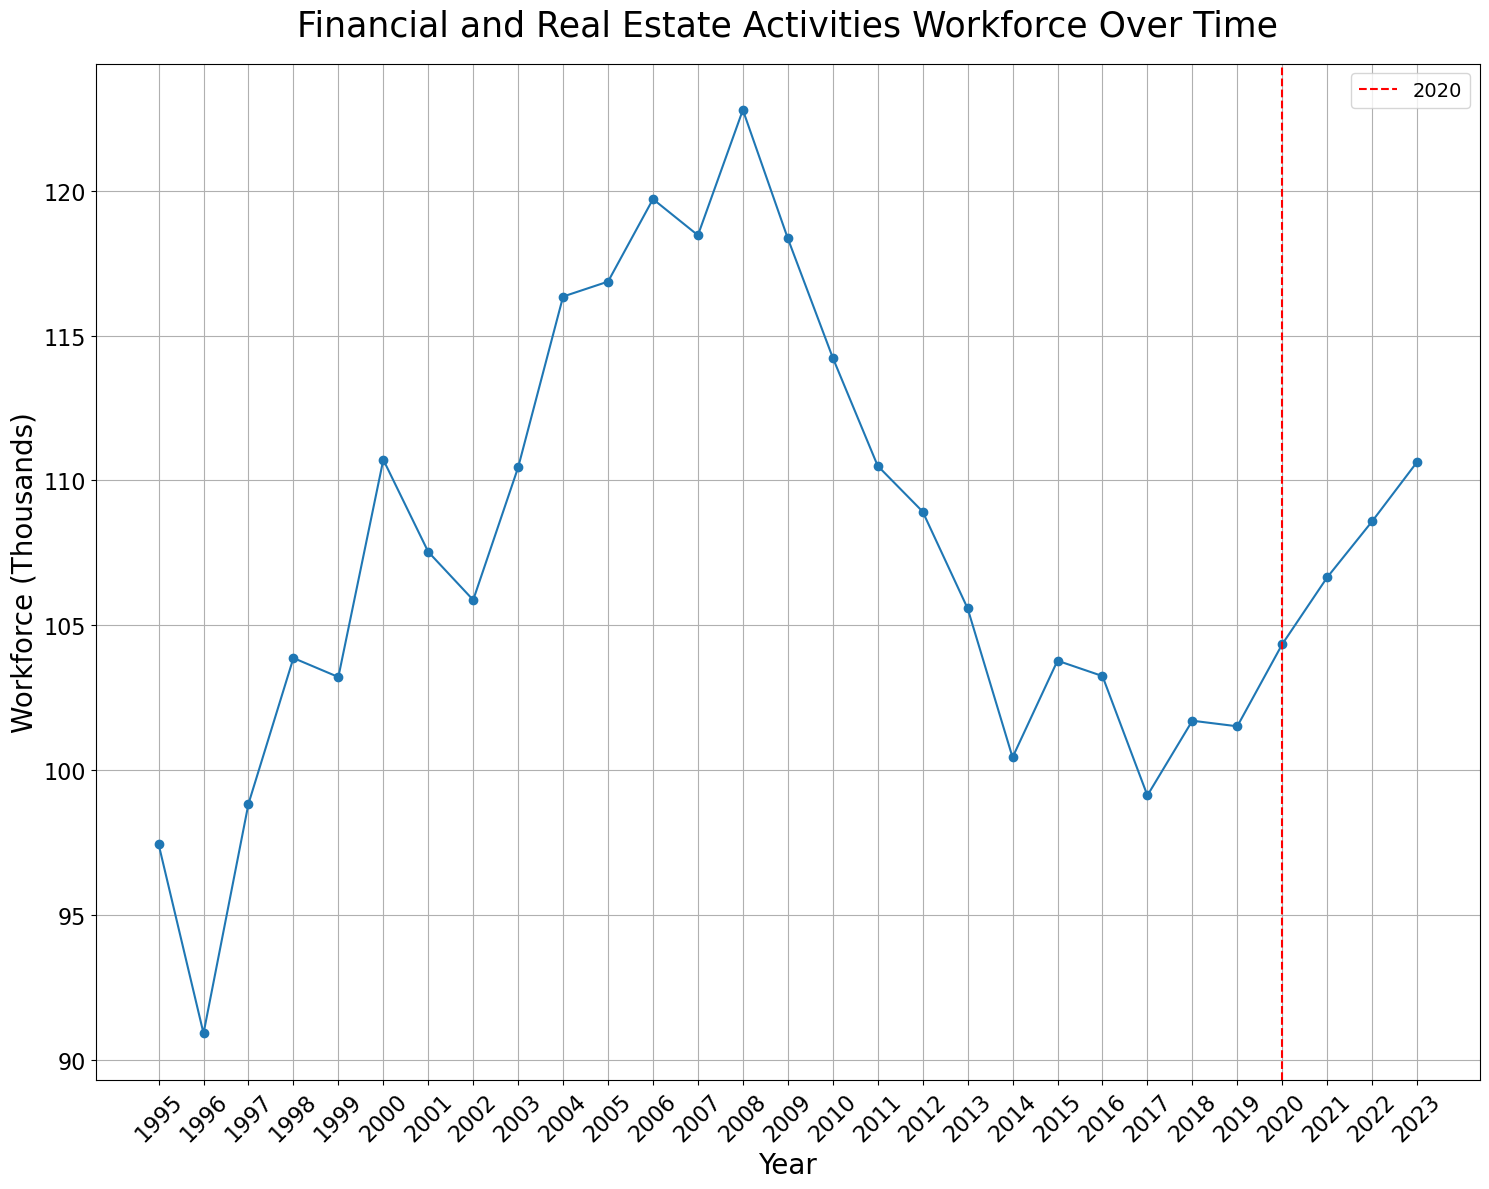

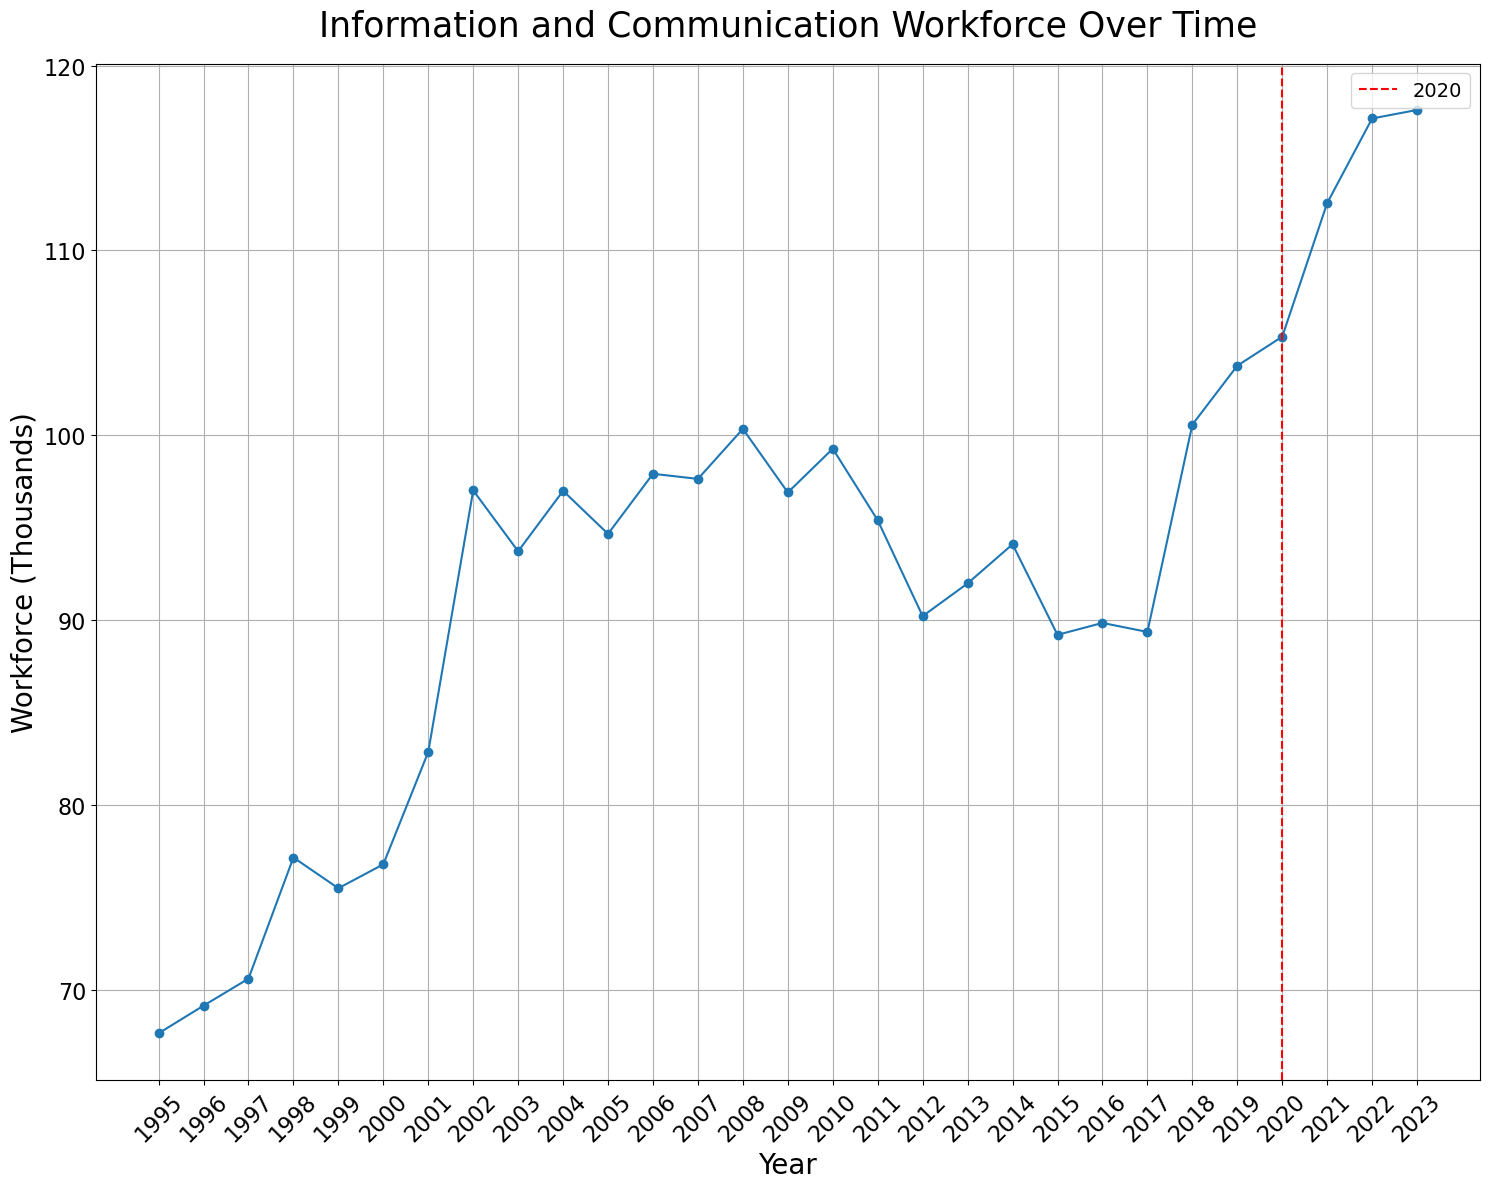

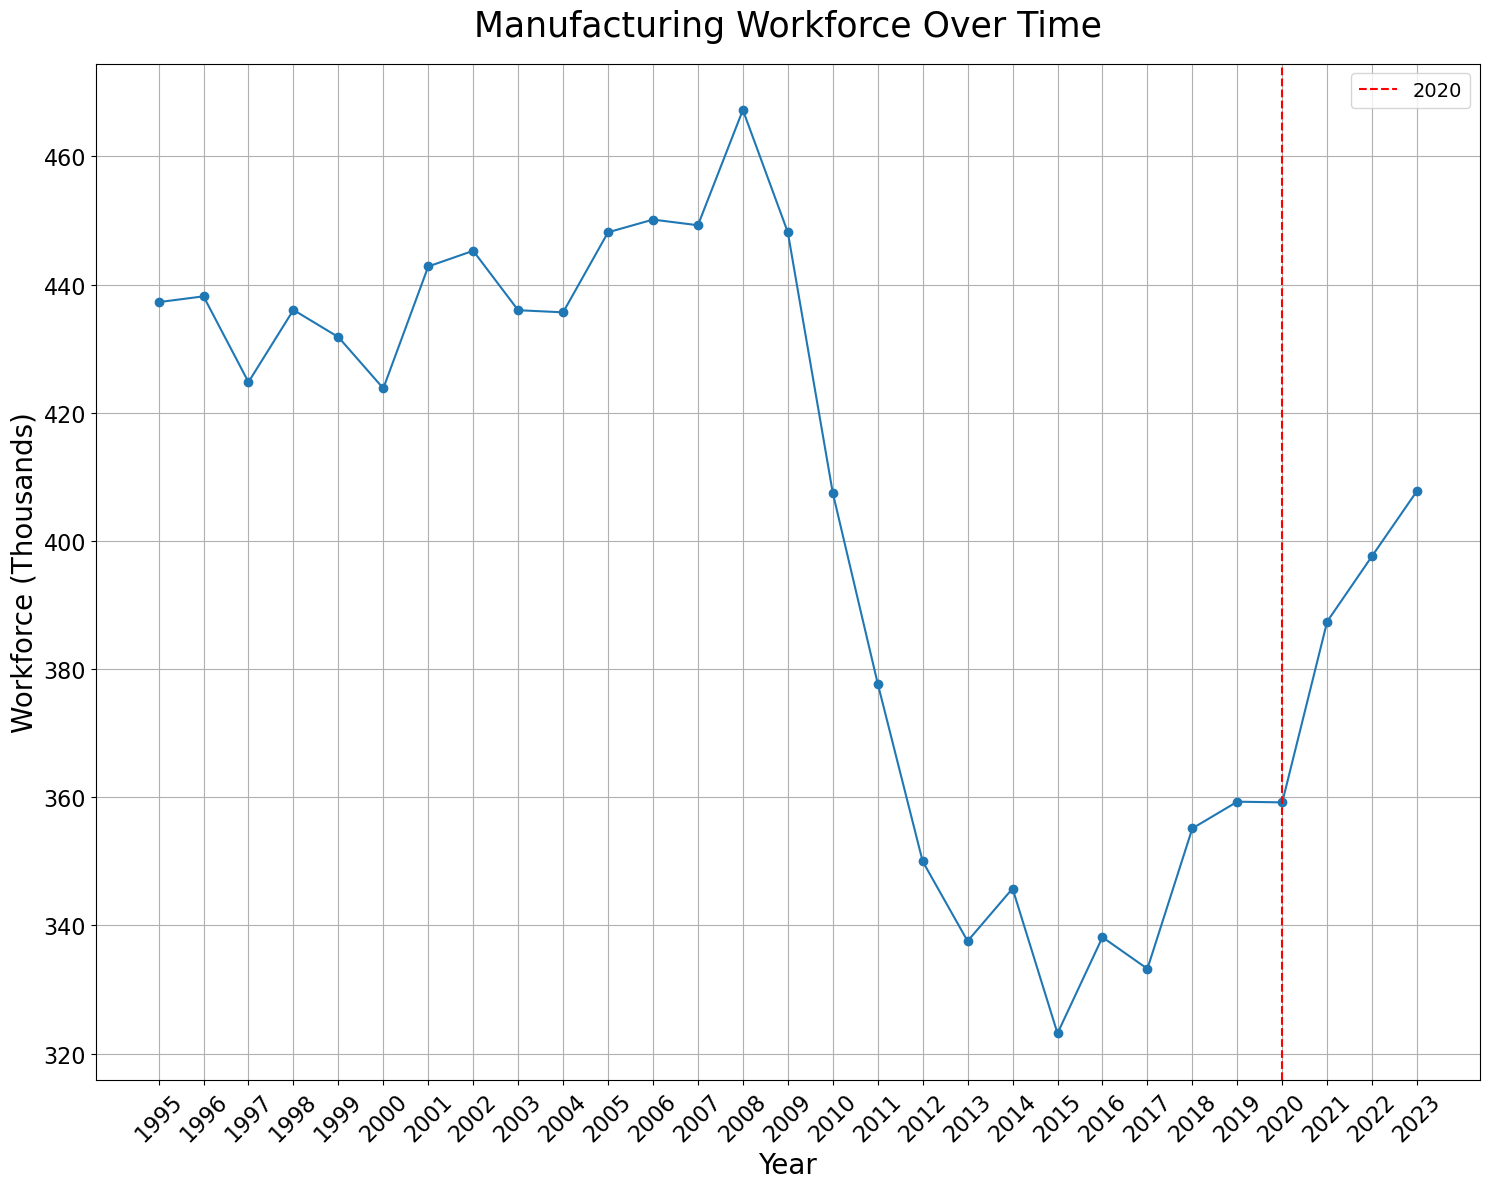

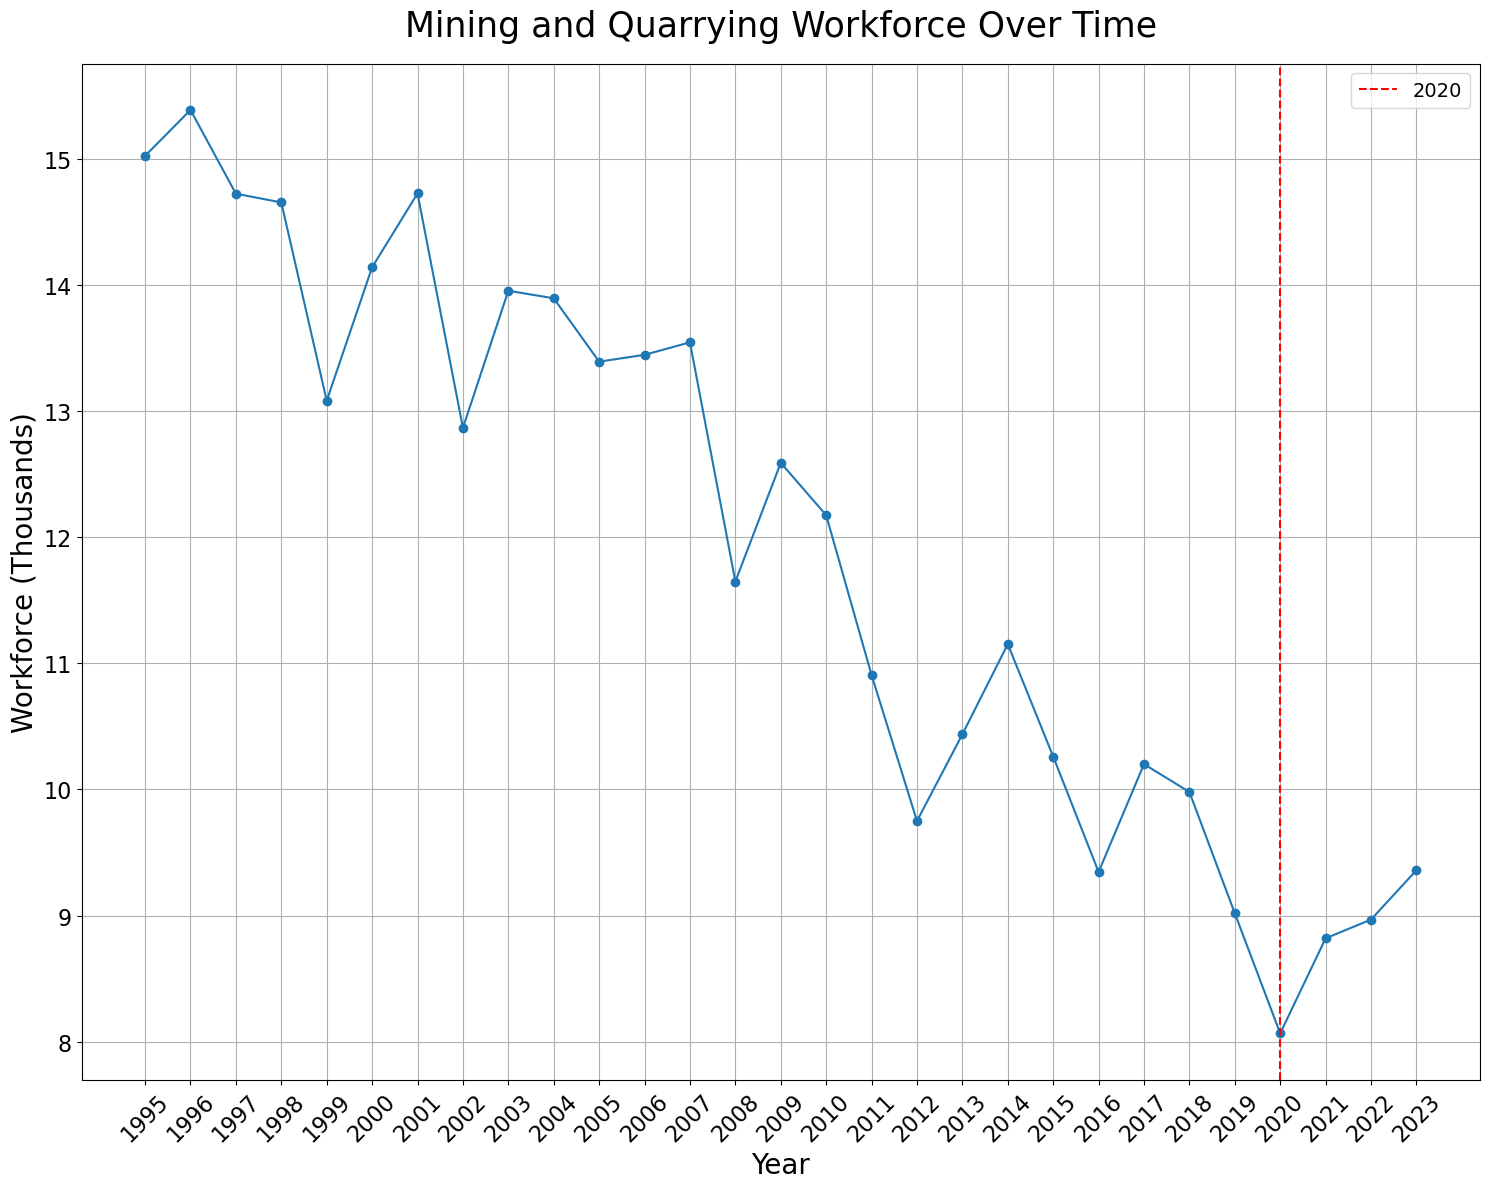

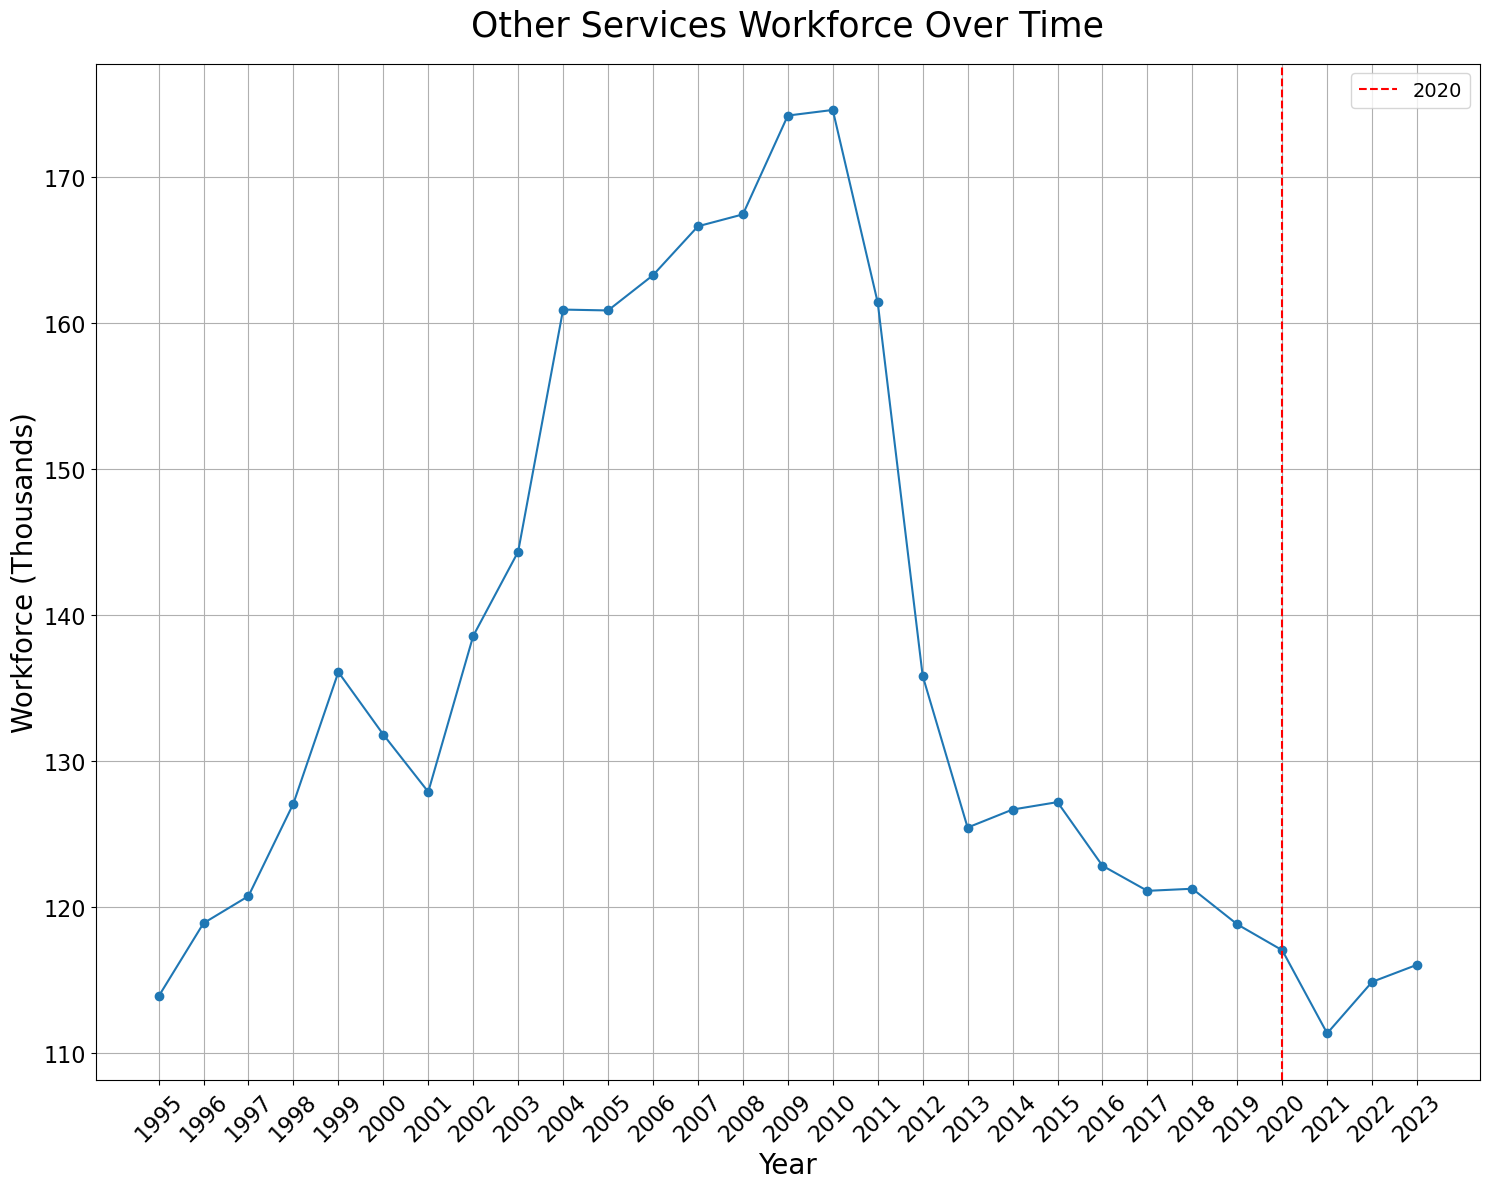

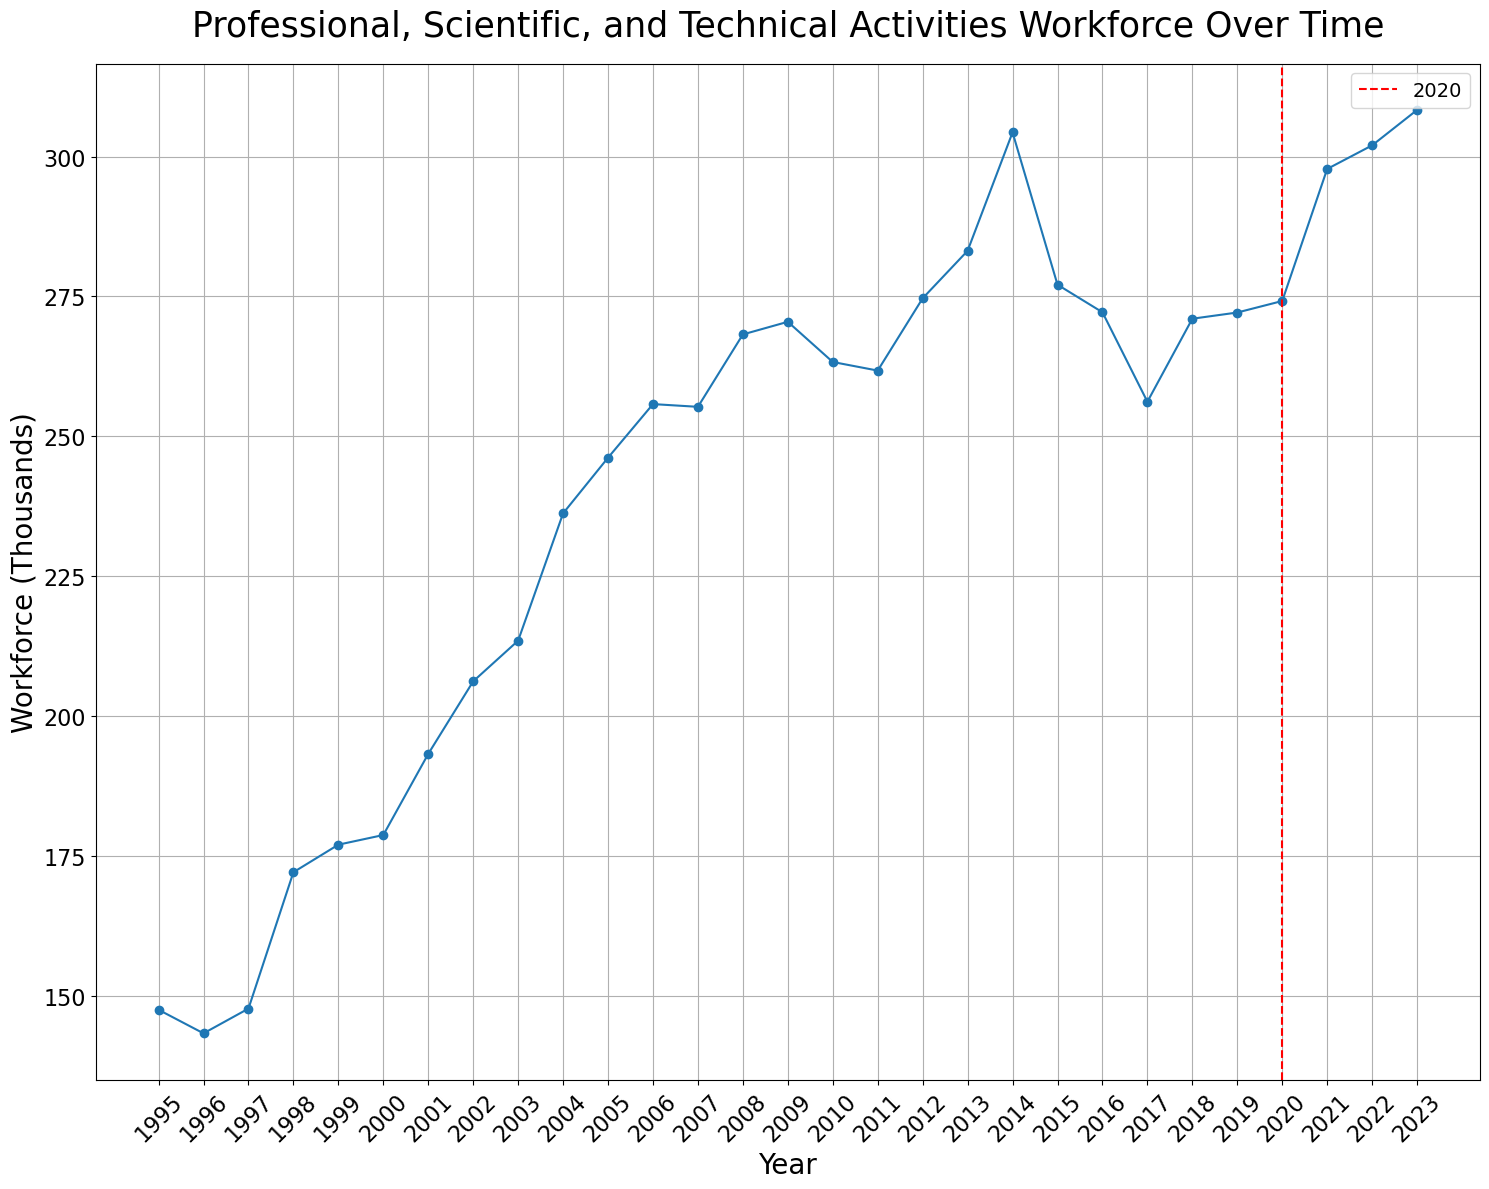

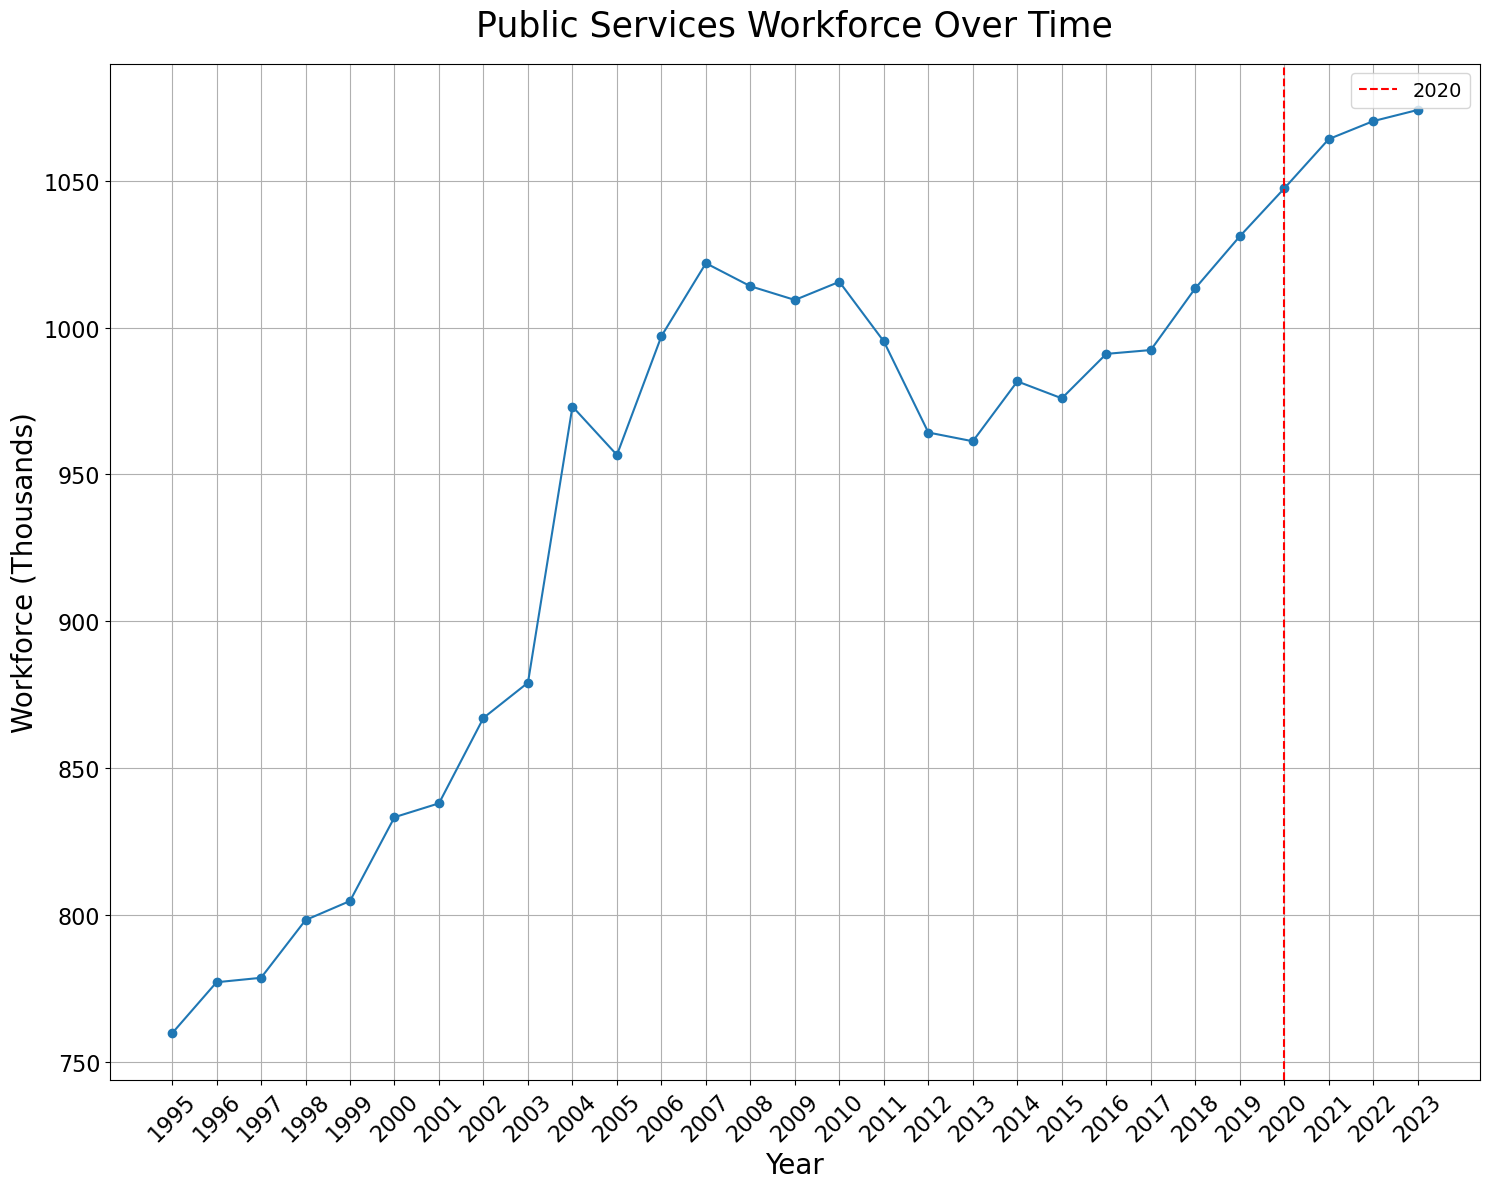

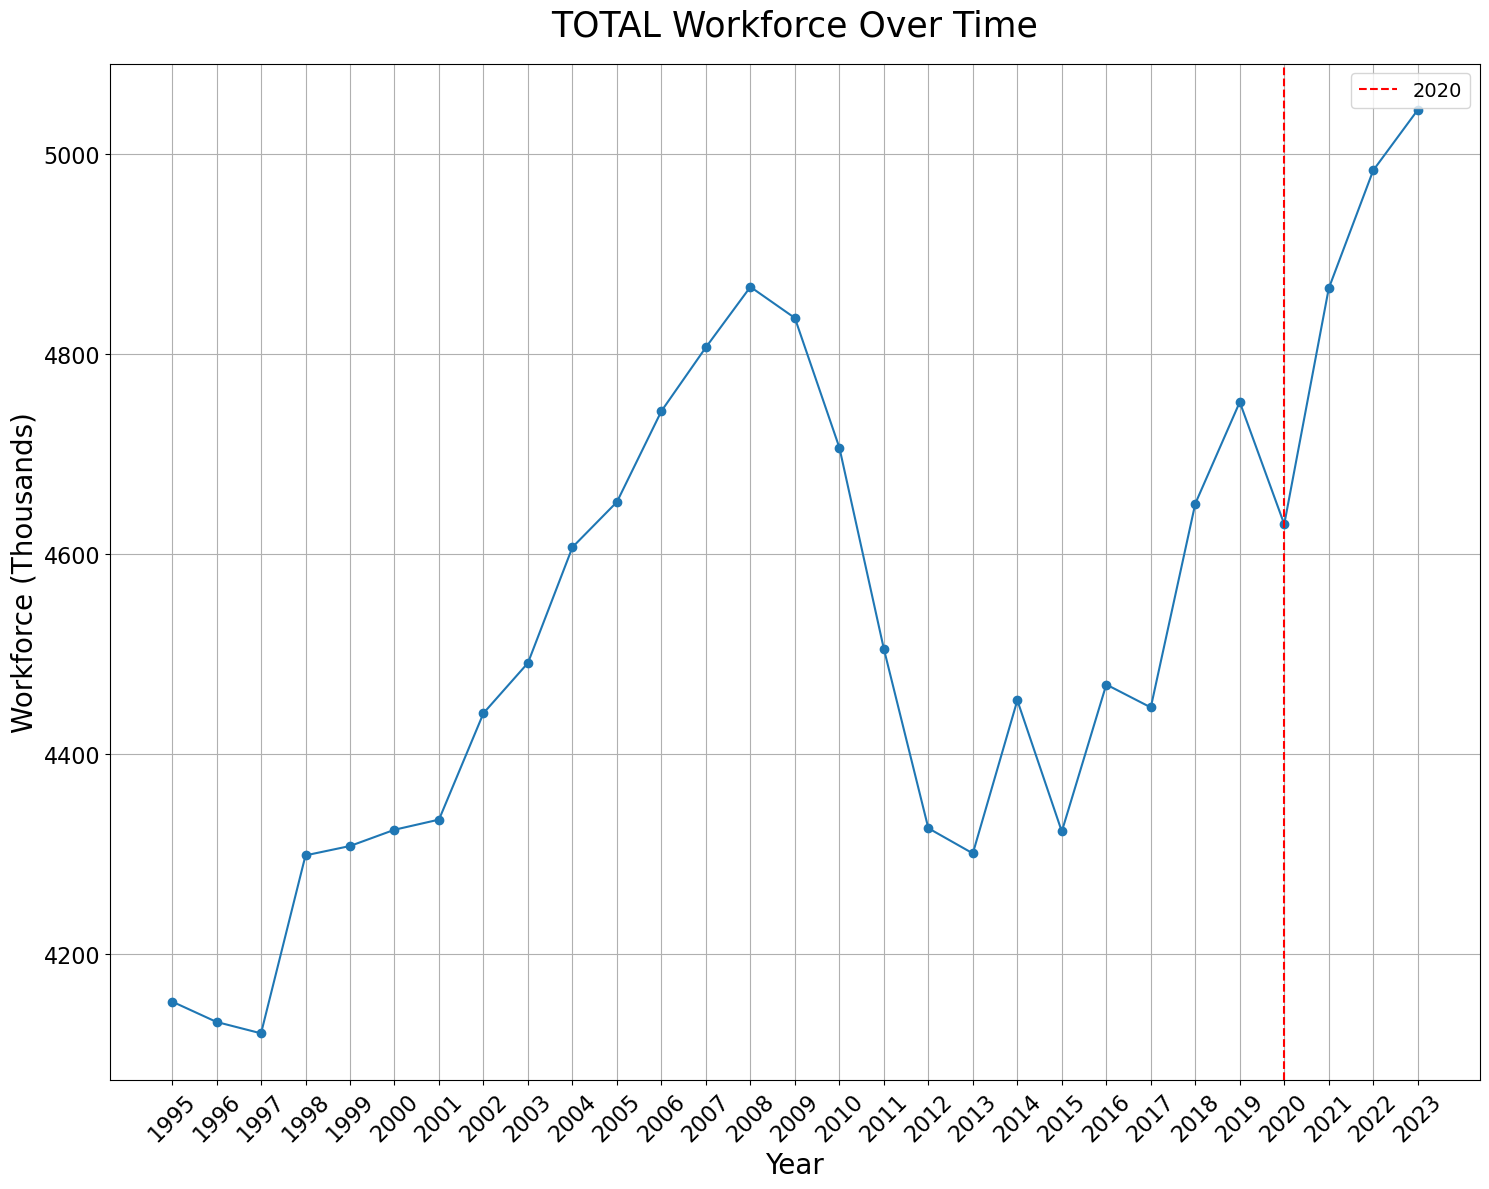

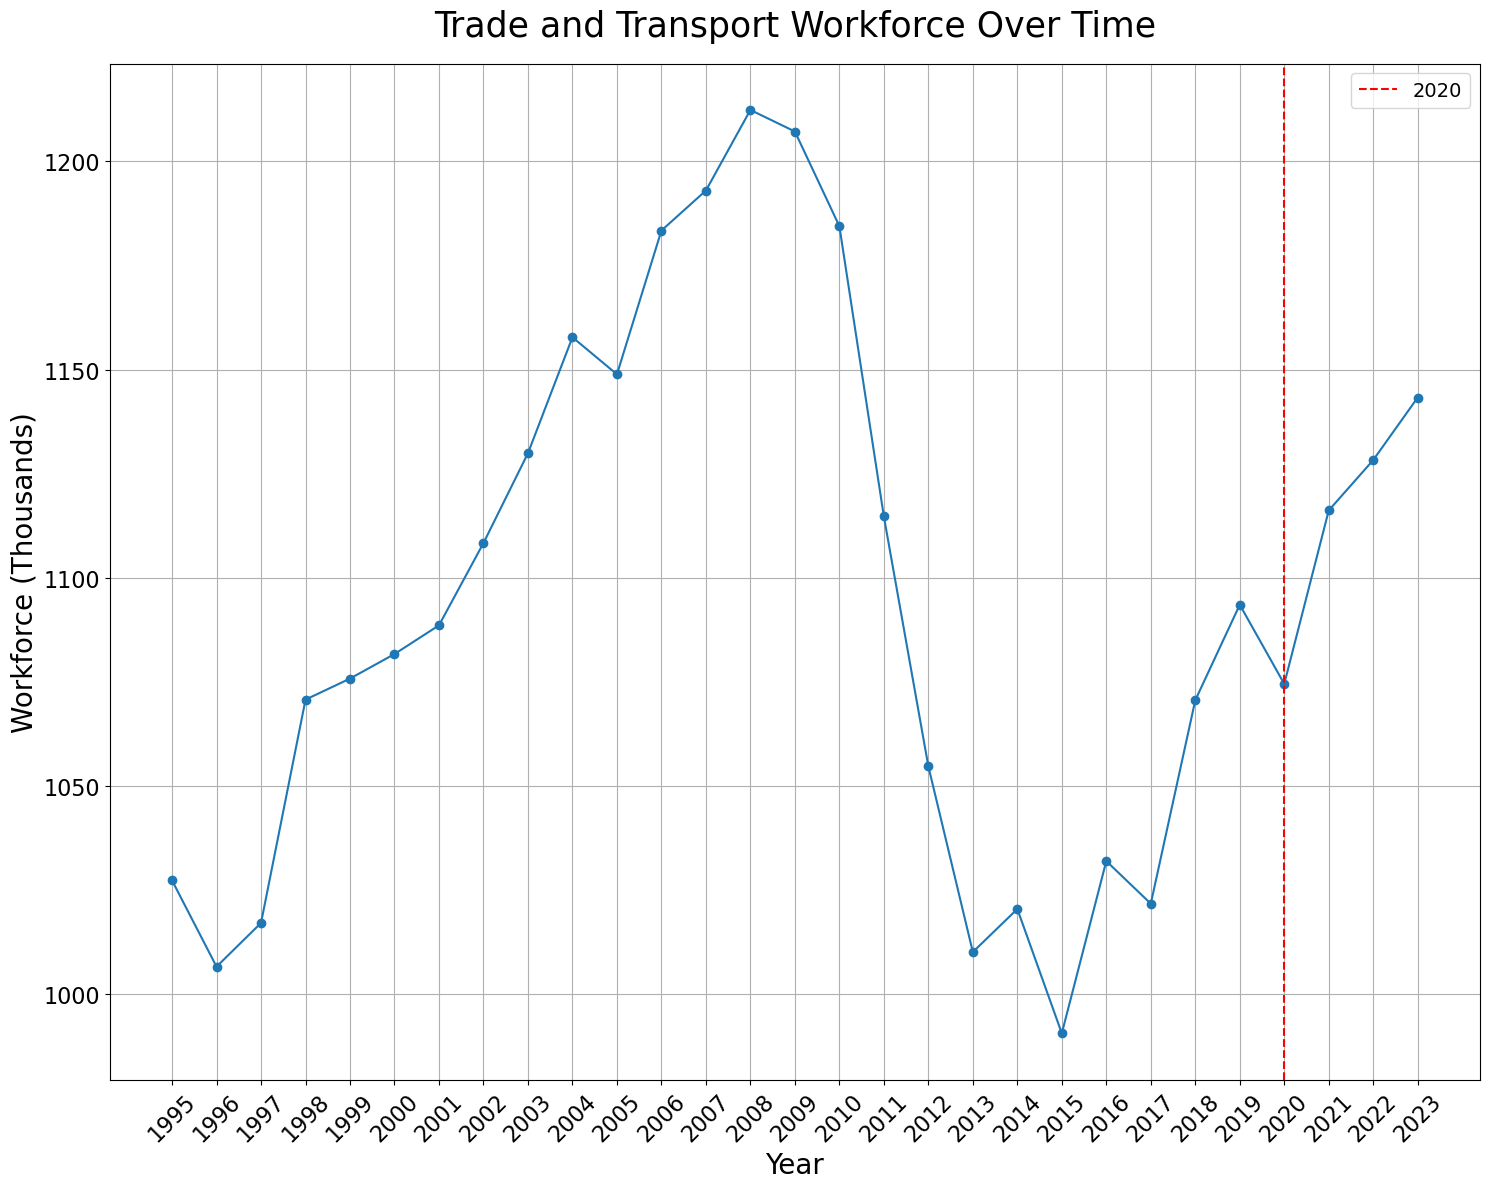

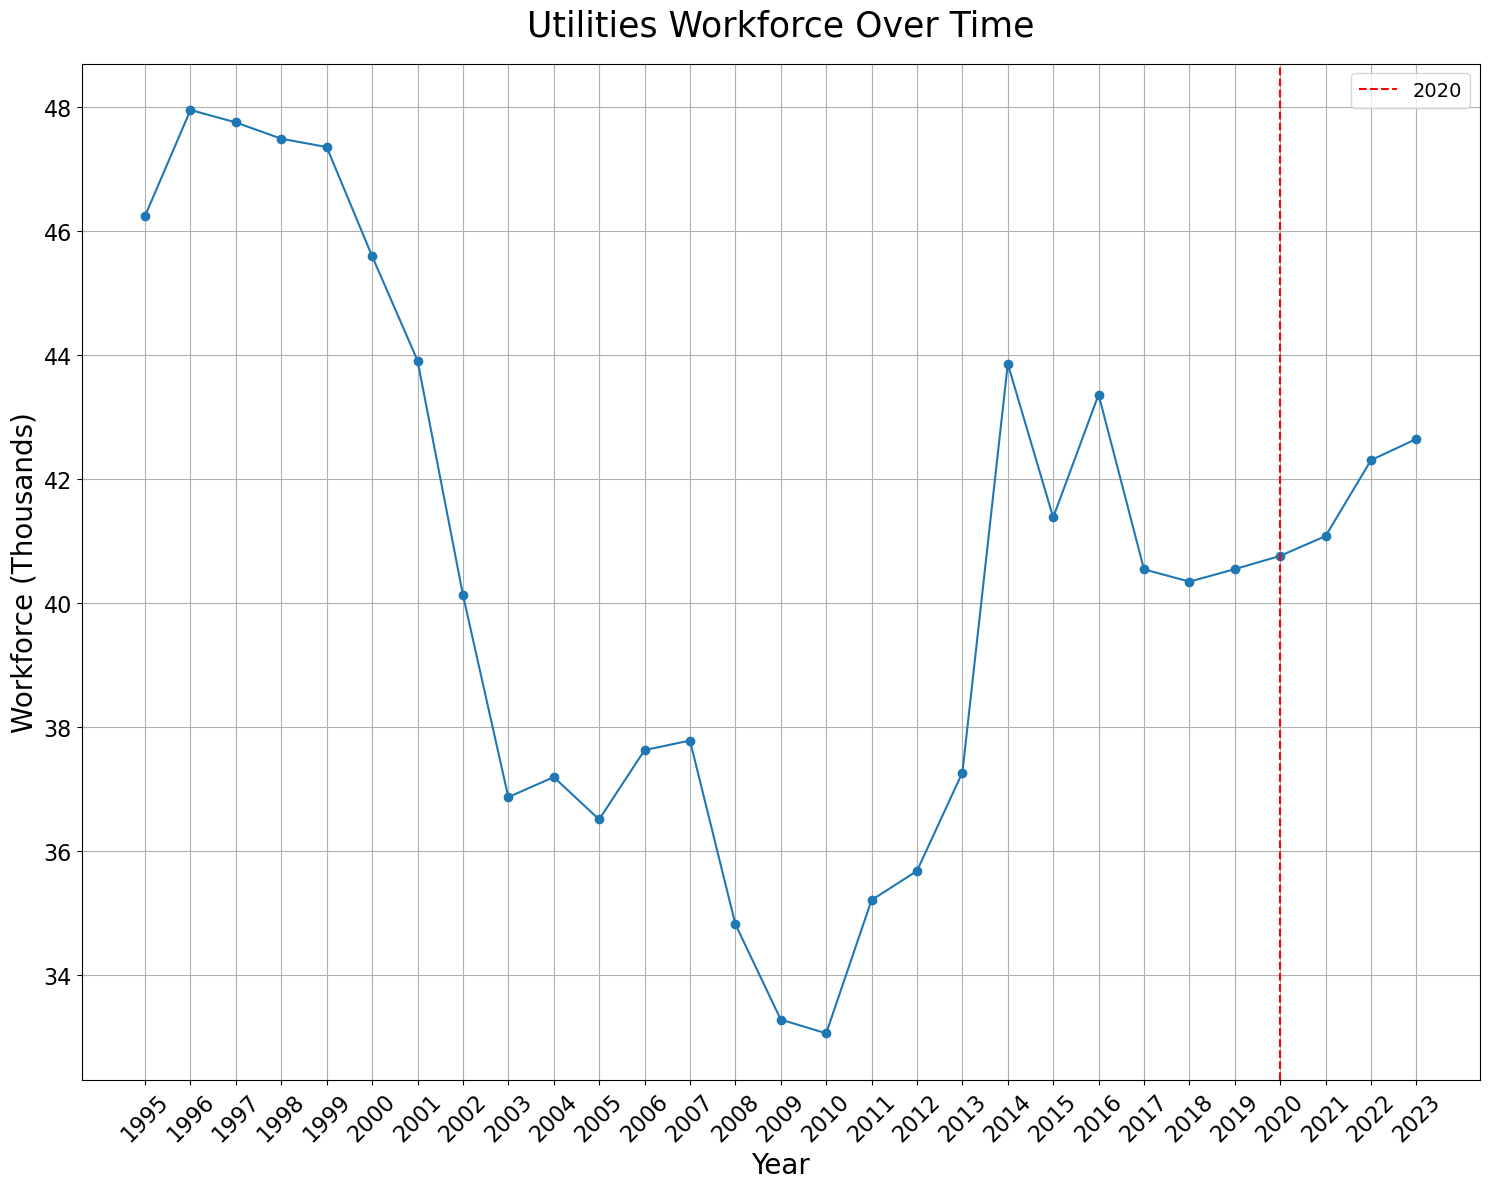

All plots have been saved to employment_workforce_plots.pdf


In [7]:
# Save all plots to a single PDF file
output_pdf = "employment_workforce_plots.pdf"

with PdfPages(output_pdf) as pdf:
    categories = employement_group.index
    for category in categories:
        plot_category(employement_group, category)
        pdf.savefig()  # Save the current figure to the PDF
        plt.show()
        

print(f"All plots have been saved to {output_pdf}")


It is prevelant that workforces in any sector related to production of products has been reduced throughout the years in Greece.
At the same time people took on academic directions and industries took a steeper turn towards seasonal and tourism businesses.

A sudden drop in 2020 is expected on almost every field of the industry due to economic restrictions forced by the COVID-19 pandemic.

Since 2020 all sectors meet an increase in workforce, a finding that is consistent with the drop in uneployement (as we will confirm later).

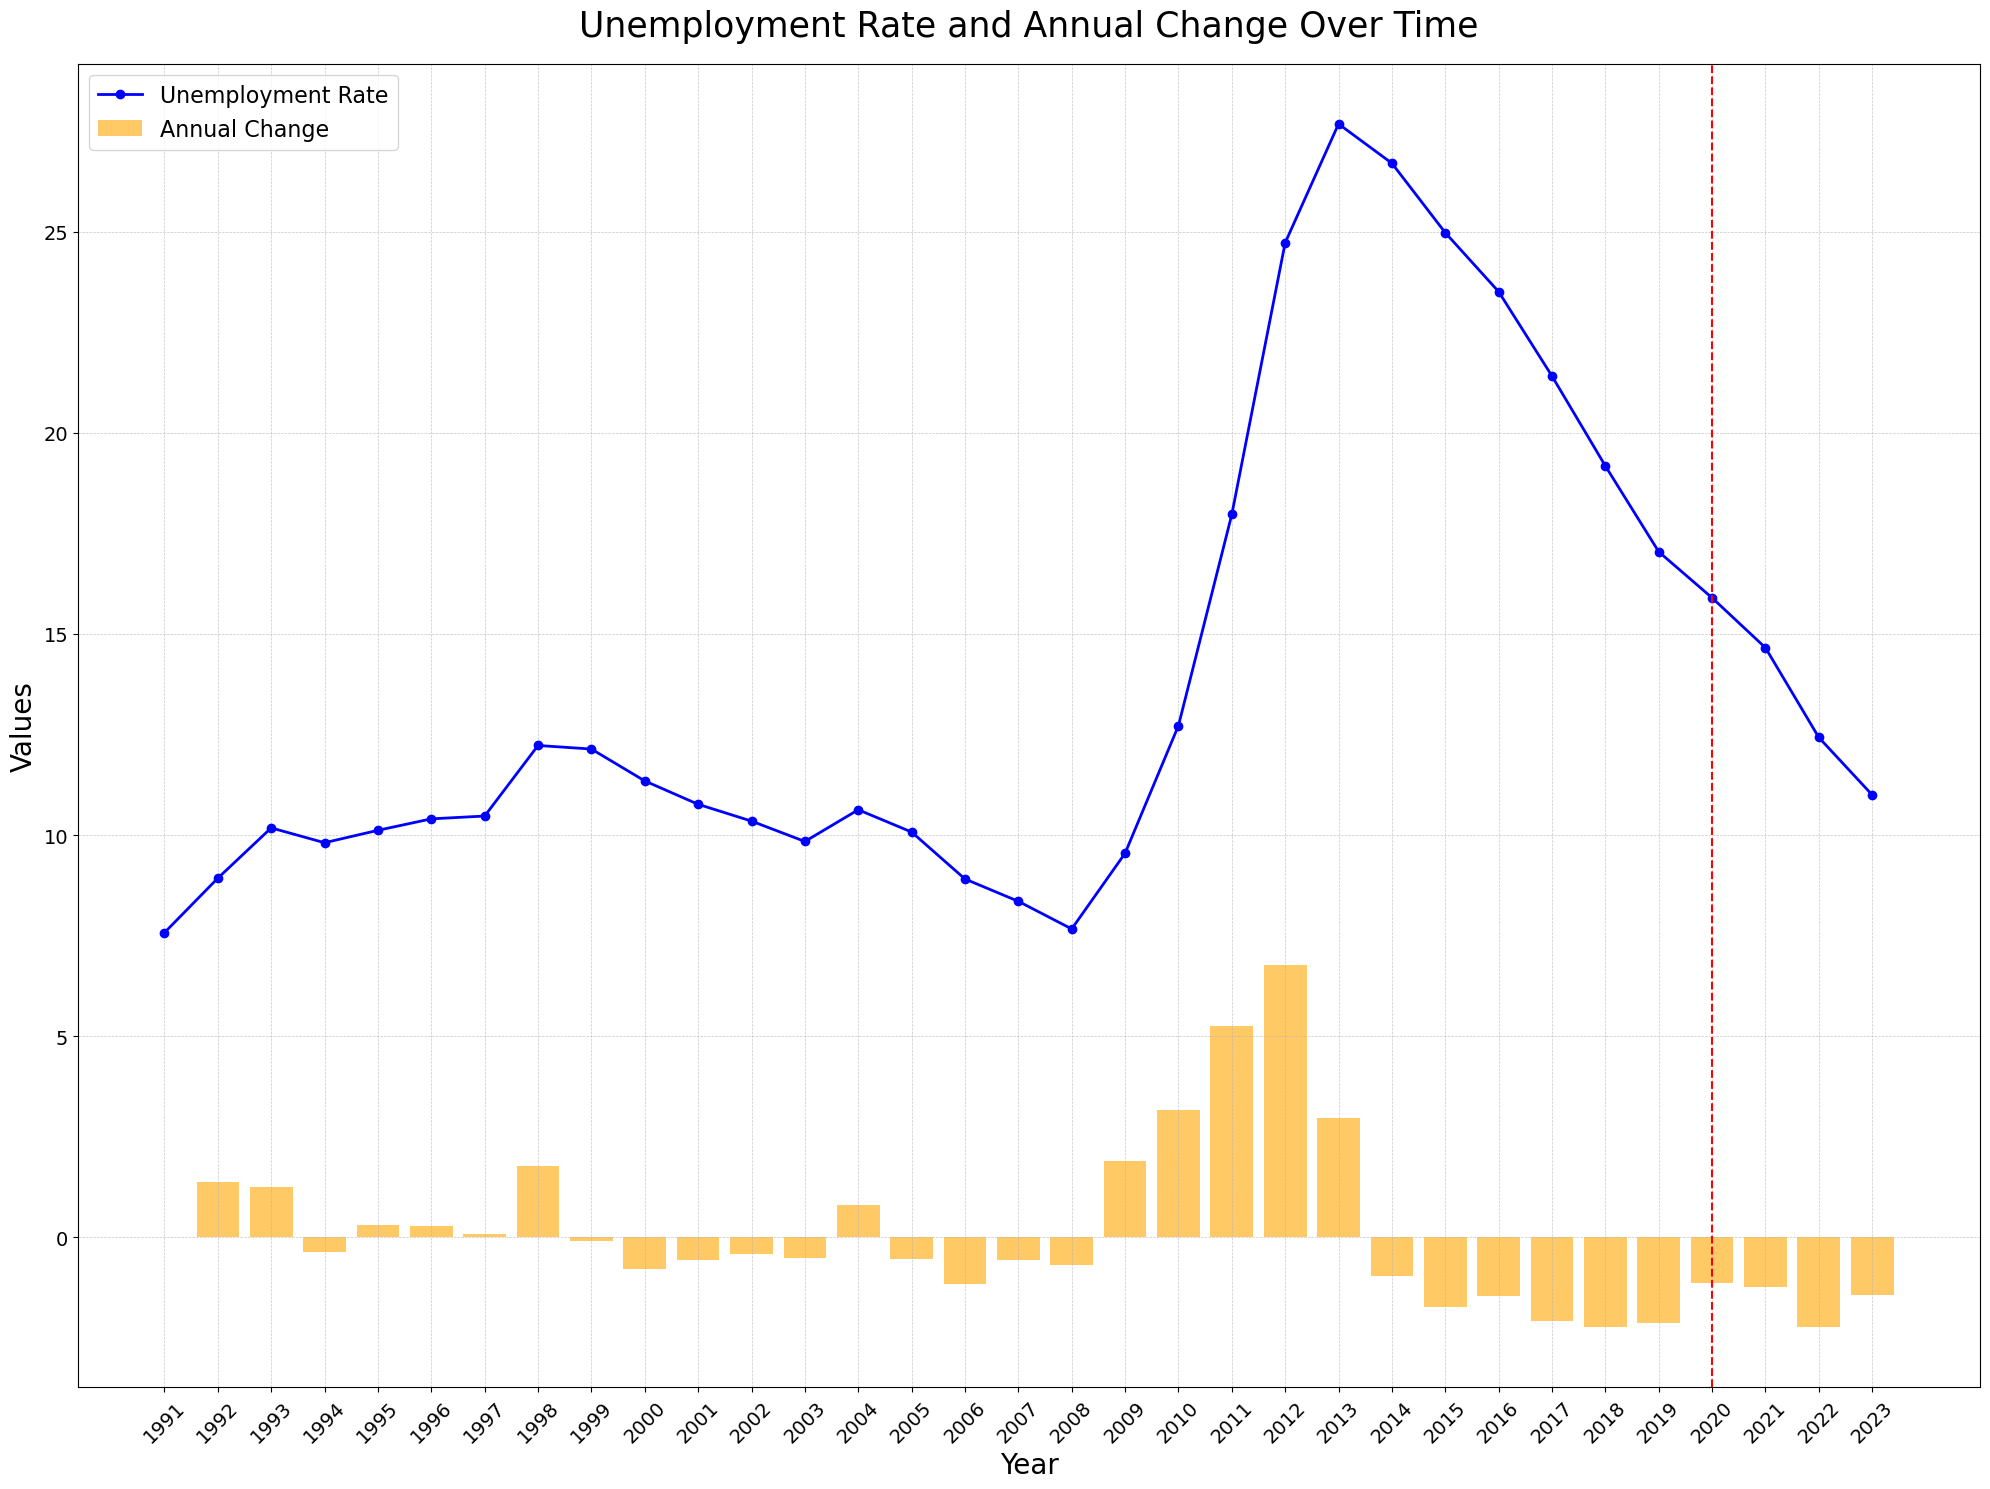

In [8]:
plt.figure(figsize=(20, 15))

# Line plot for unemployment rate
plt.plot(
    unemployement['Date'],
    unemployement['Unemployement rate'],
    color='blue',
    linewidth=2,
    label='Unemployment Rate',
    marker='o'
)

# Bar plot for annual change
plt.bar(
    unemployement['Date'],
    unemployement['Annual change'],
    color='orange',
    alpha=0.6,
    label='Annual Change'
)

plt.title('Unemployment Rate and Annual Change Over Time', fontsize=25, pad=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Values', fontsize=20)

plt.xticks(unemployement['Date'], fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(fontsize=16, loc='upper left')
plt.axvline(x=2020, linestyle='--', color='red')
plt.tight_layout()

plt.savefig('Unemployment Rate and Annual Change Over Time.png')
plt.show()


As we can see (and expected) unemployement reached a peak of more ~27% in 2013. One in four people were unemployed at the time. Since then, and even during the pandemic, citizen needs for jobs is accomodated more efficiently. This is a strong indicator of economic growth for Greece.

In [9]:
crime_data.loc[:, ['Year', 'Offences per 100,000 inhabitants']]

,Year,"Offences per 100,000 inhabitants"
0,2000,3416
1,2005,4156
2,2010,3004
3,2011,1744
4,2012,1752
5,2013,1816
6,2014,1741
7,2015,1815
8,2016,1903
9,2017,2054


In [10]:
def plot_category(data, category):
    years = data.loc[:, 'Year']
    total_data = data.loc[:, category]

    plt.figure(figsize=(15, 12))
    plt.plot(years, total_data.values, marker='o')

    plt.title(f'{category} ', fontsize=25, pad=20)
    plt.xticks(years

, fontsize=16, rotation=45)
    plt.xlabel('Year', fontsize=20)

    plt.yticks(fontsize=16)
    plt.ylabel('Total records (per 100,000)', fontsize=20)

    plt.axvline(x=2020, color='red', linestyle='--', label='2020')
    plt.legend(fontsize=14)

    plt.grid(True)
    plt.tight_layout()

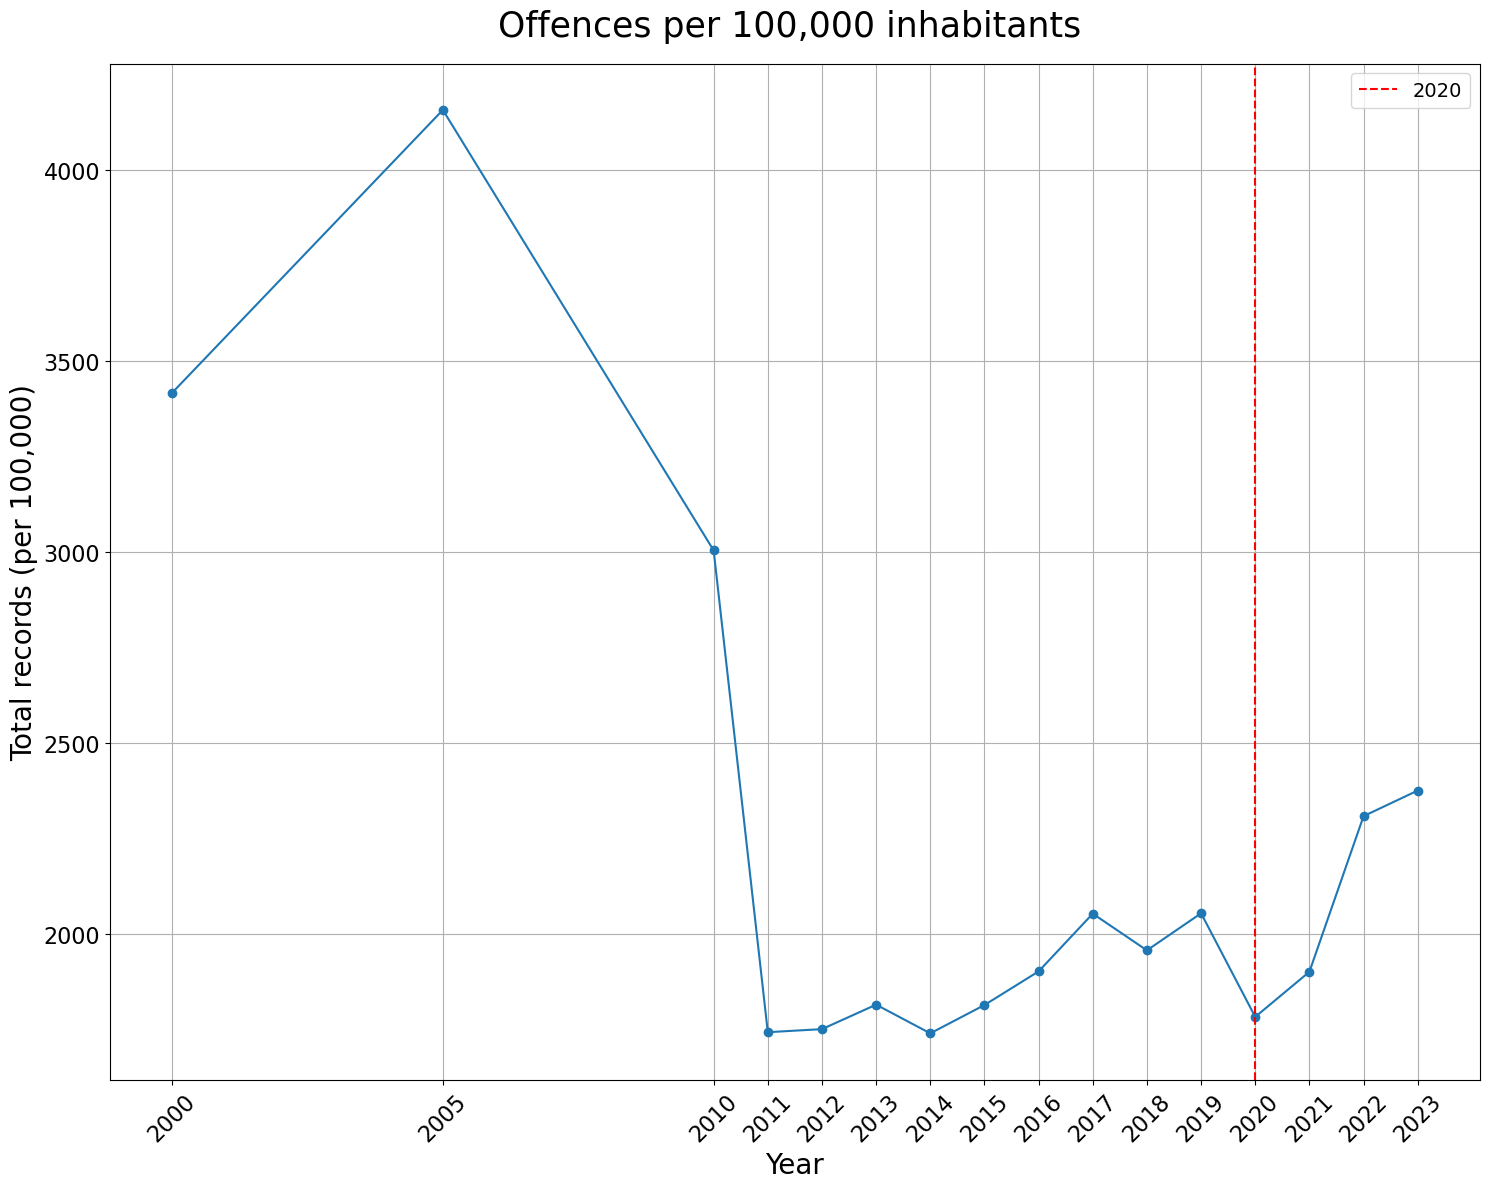

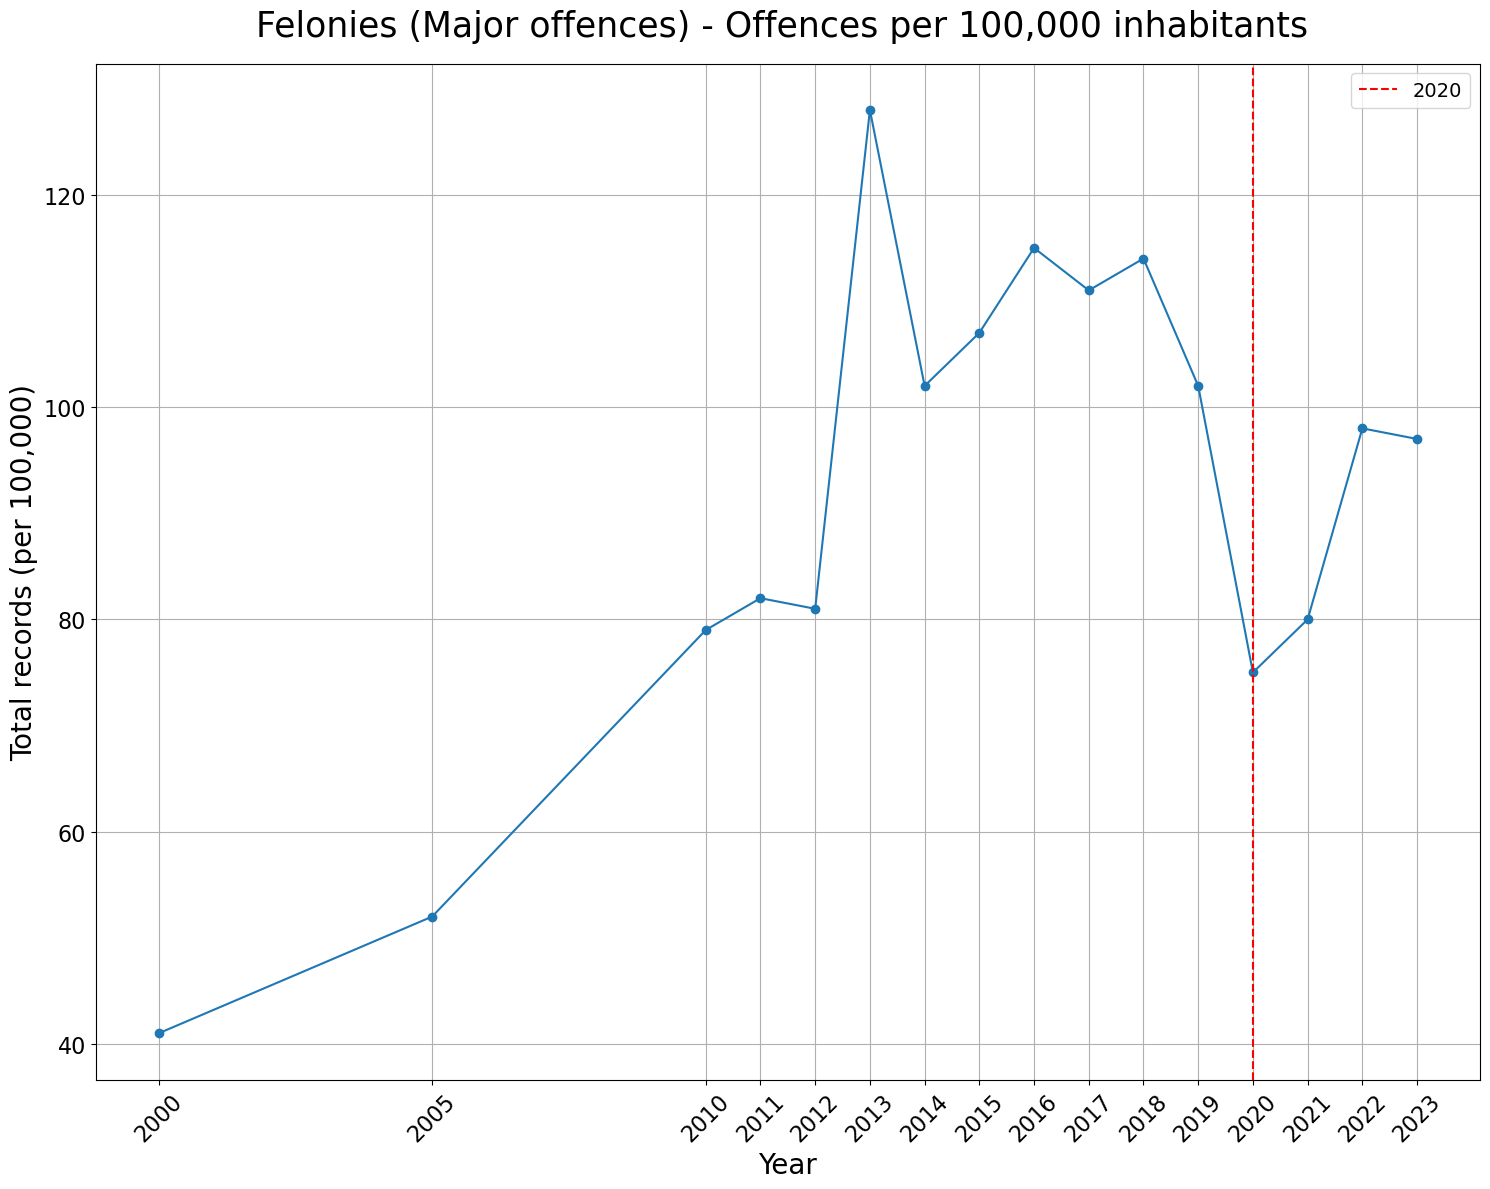

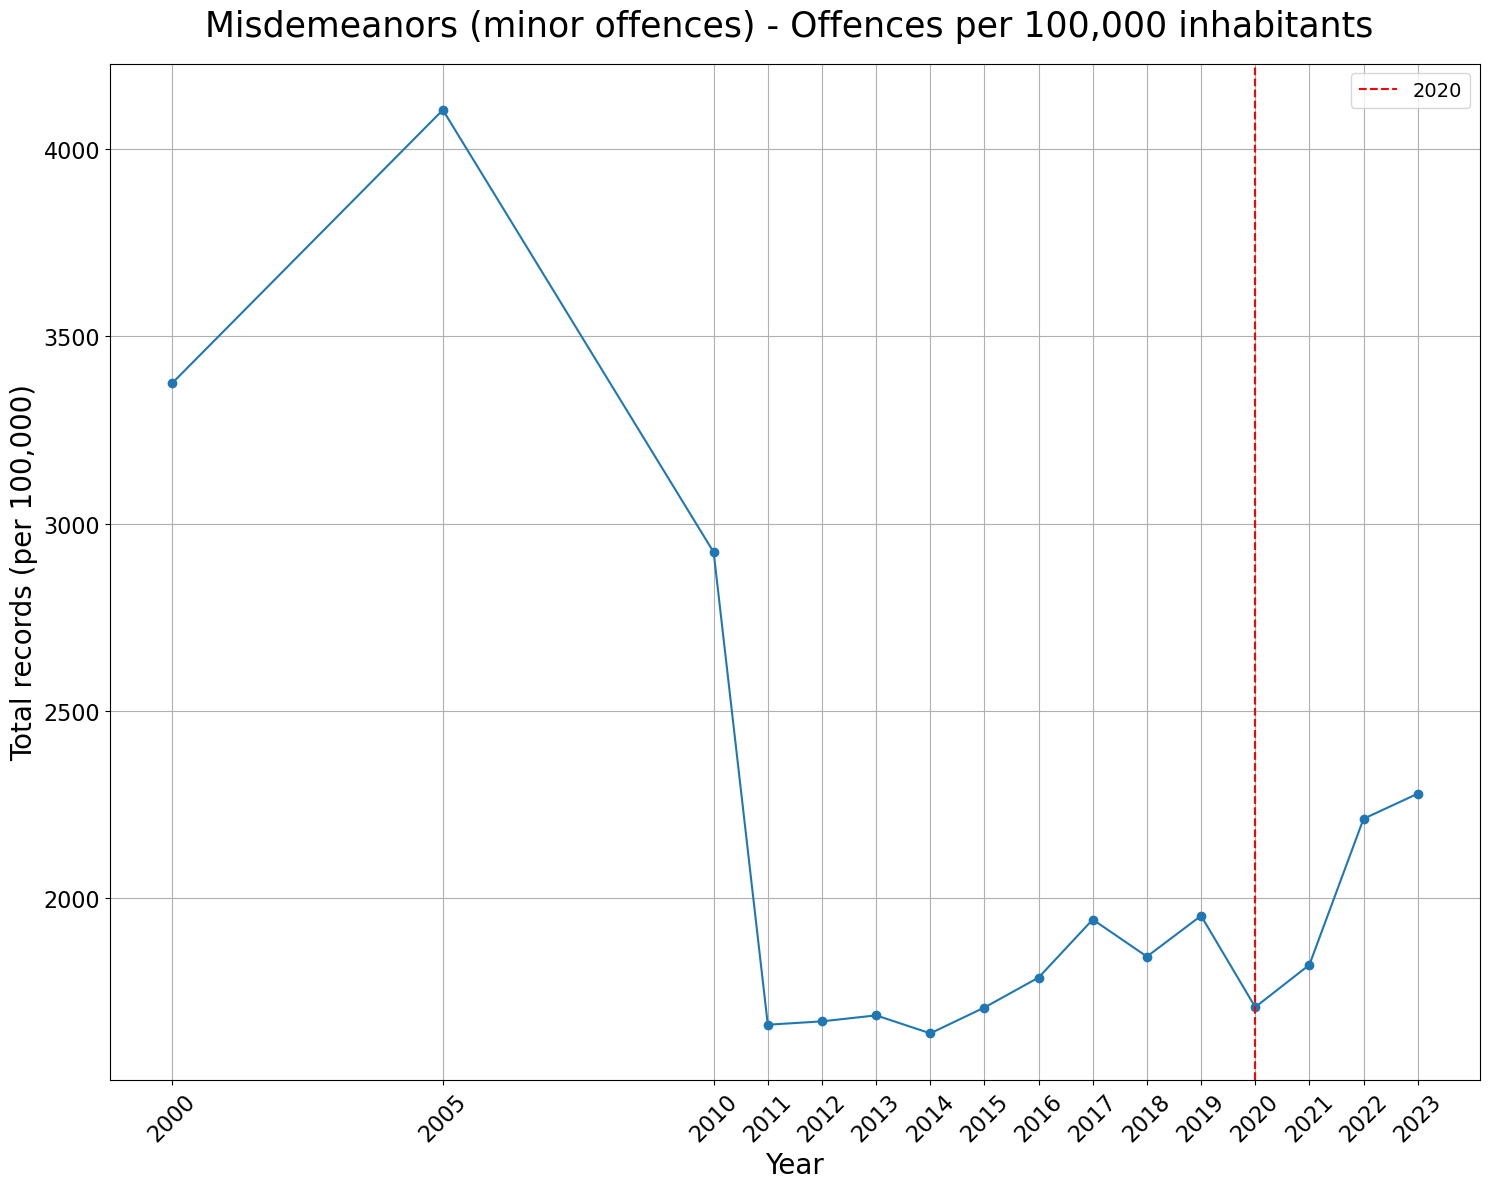

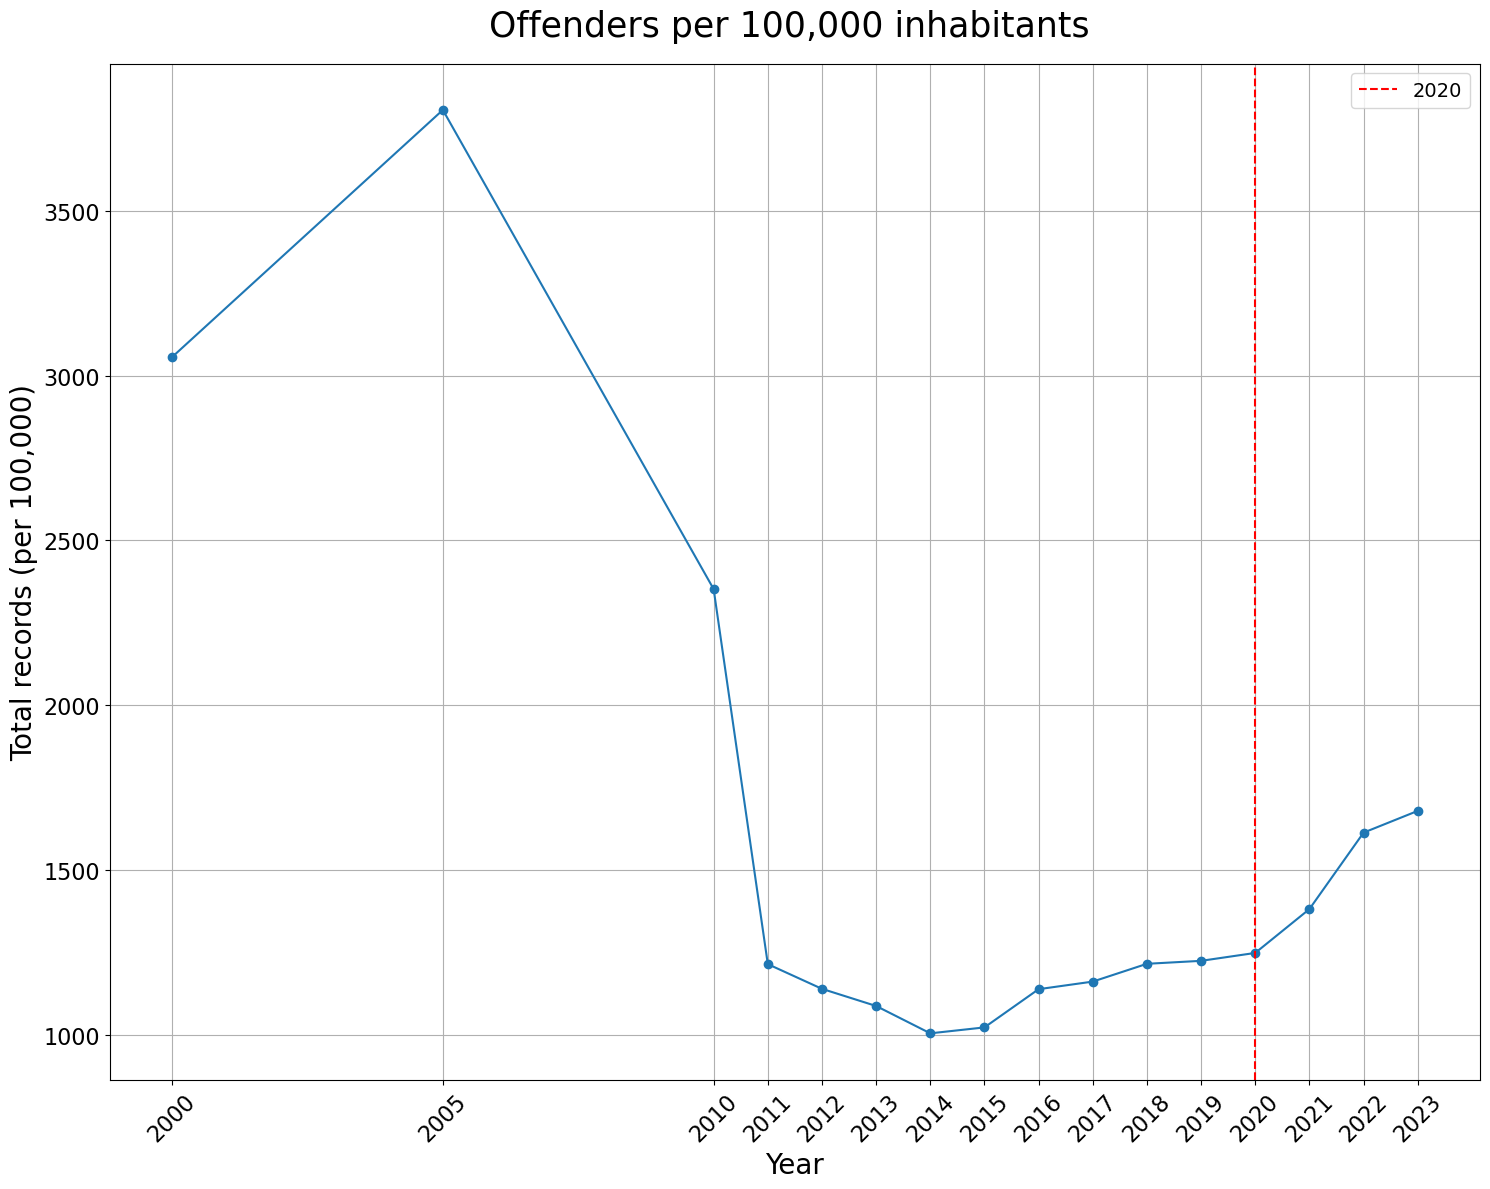

All plots have been saved to crime_data_per_100k, plots.pdf


In [11]:
output_pdf = "crime_data_per_100k, plots.pdf"

with PdfPages(output_pdf) as pdf:
    categories = crime_data.columns[2::2]
    for category in categories:
        plot_category(crime_data, category)
        pdf.savefig()  
        plt.show()
        

print(f"All plots have been saved to {output_pdf}")

Usually, when a country goes through economic recession or intense political changes, criminality tends to increase. In our case we witness a small and gradual increase of criminality since the global pandemic of COVID-19. This increase is also inconsistent with the economic prosperity made throughoit these years.

Despite the drop of unemployement to just above 10%, the increase in academic careers followed by people and the decrease of manual labor the total criminal acts density increased a little.

This can be potentially be the cause of increasing prices in almost all products. This assumption is consistent with the decrease of workforce in agriculture, forestry and fishing and increase of workforce trading. An increase in purchased products and decrease in native Greek products can potentially ultimately lead to the increase in prices.

Subsequently, less access to products, and especially basic needs coverage, can potentially lead to higher aggression and misdemeanots such as theft attemps.

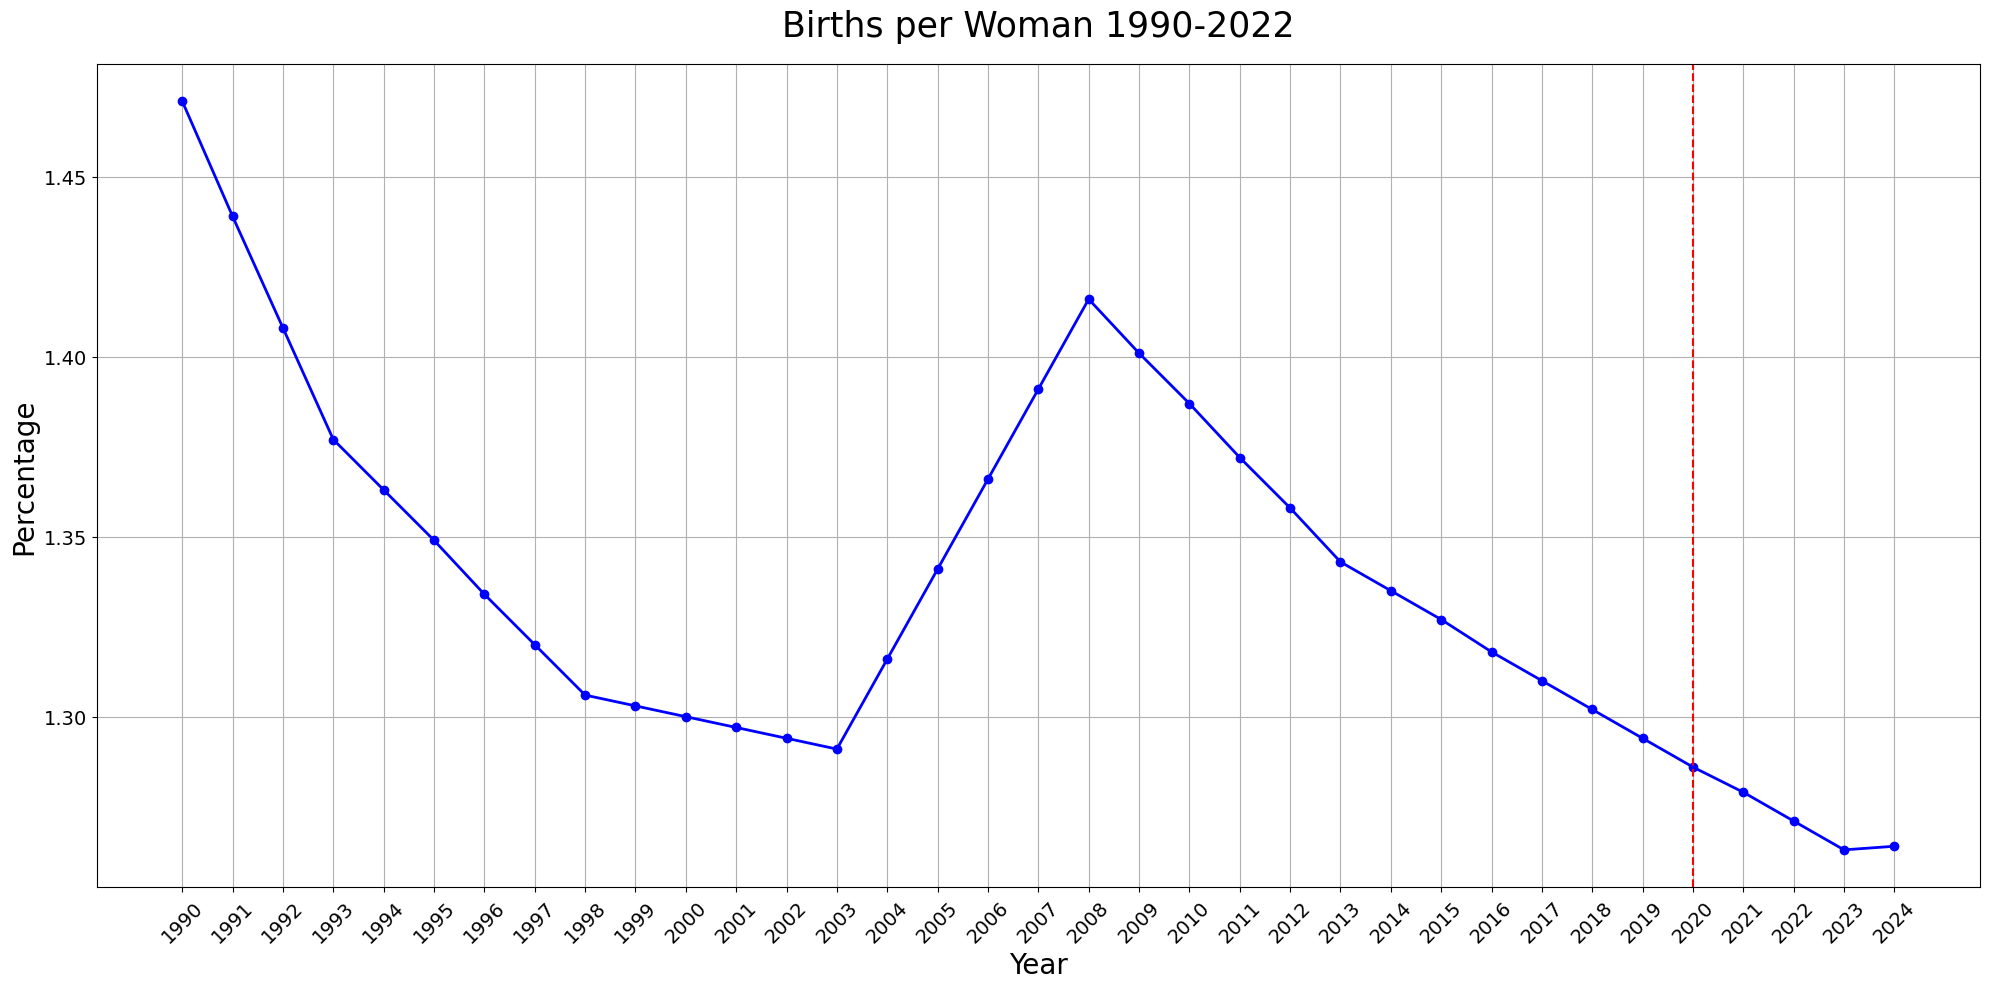

In [12]:
plt.figure(figsize=(20,10))
plt.plot(fertility.loc[:, 'Date'], 
         fertility.loc[:, 'Births per woman'],    
        color='blue',
        linewidth=2,
        label='Fertility Rate',
        marker='o')

plt.title('Births per Woman 1990-2022', fontsize=25, pad=20)

plt.xlabel('Year', fontsize=20)
plt.xticks(fertility['Date'], rotation=45, fontsize=14)

plt.ylabel('Percentage', fontsize=20)
plt.yticks(fontsize=14)

plt.axvline(x=2020, linestyle='--', color='red')
plt.grid(True)

plt.tight_layout()

plt.savefig('fertility.png')
plt.show()

A noticeable drop in fertility rate of ~0.25 is noticeable since 2008. This is a consistent finding with the economic recession that started in 2008 for Greece. Despite thee economic comeback since 2013, the birth rate of Greece keeps dropping until 2023, stabilizing at 2024 and increasing slightly.

This points to some sort of inability or unwillingness of couples to reproduce largely related to economic factors. This is an inconsistent finding for the years since 2020 until present day, where economic prosperity should be bringing higher fertility rates.

At this point we must mention that the fertility rate of a country is a variable roots not only in economics but other social factors as well.

In [13]:
wages_group = wages.drop(columns='Quarter').groupby('Year').mean().round(2)
wages_group

,Index Ι,q-o-q change %,Y-o-y change %,Index II,q-o-q change %.1,Y-o-y change %.1,Index III,q-o-q change %.2,Y-o-y change %.2
Year,,,,,,,,,
2008,114.10,1.48,4.60,114.00,1.23,4.42,114.12,1.42,4.62
2009,113.85,2.52,-0.22,113.85,1.72,-0.05,113.82,2.52,-0.27
2010,114.62,-0.95,1.20,114.78,-1.15,0.98,114.52,-0.92,1.10
2011,109.08,-1.17,-4.80,109.02,-1.85,-5.03,108.90,-1.25,-4.90
2012,100.10,-0.22,-8.30,100.08,-0.98,-8.15,100.10,-0.20,-8.12
2013,90.20,-1.92,-9.85,90.10,-2.72,-9.95,90.15,-1.90,-9.90
2014,90.95,1.20,0.72,90.62,0.55,0.60,90.85,1.12,0.70
2015,90.00,0.65,-1.08,89.90,0.05,-0.82,89.98,0.70,-1.00
2016,91.20,0.65,1.40,91.12,0.00,1.38,91.15,0.60,1.35


The differences among the indexes is quite small. Taking the average and perform analysis on that mean index will not reduce much of the statistical importance

In [14]:
wages_group.loc[:, 'Average Index'] = ((wages_group.loc[:, 'Index Ι'] + wages_group.loc[:, 'Index II'] + wages_group.loc[:, 'Index III']) / 3).round(2)

In [15]:
mean_wages_group = pd.DataFrame(wages_group.loc[:, 'Average Index'])

In [16]:
mean_wages_group

,Average Index
Year,
2008,114.07
2009,113.84
2010,114.64
2011,109.00
2012,100.09
2013,90.15
2014,90.81
2015,89.96
2016,91.16


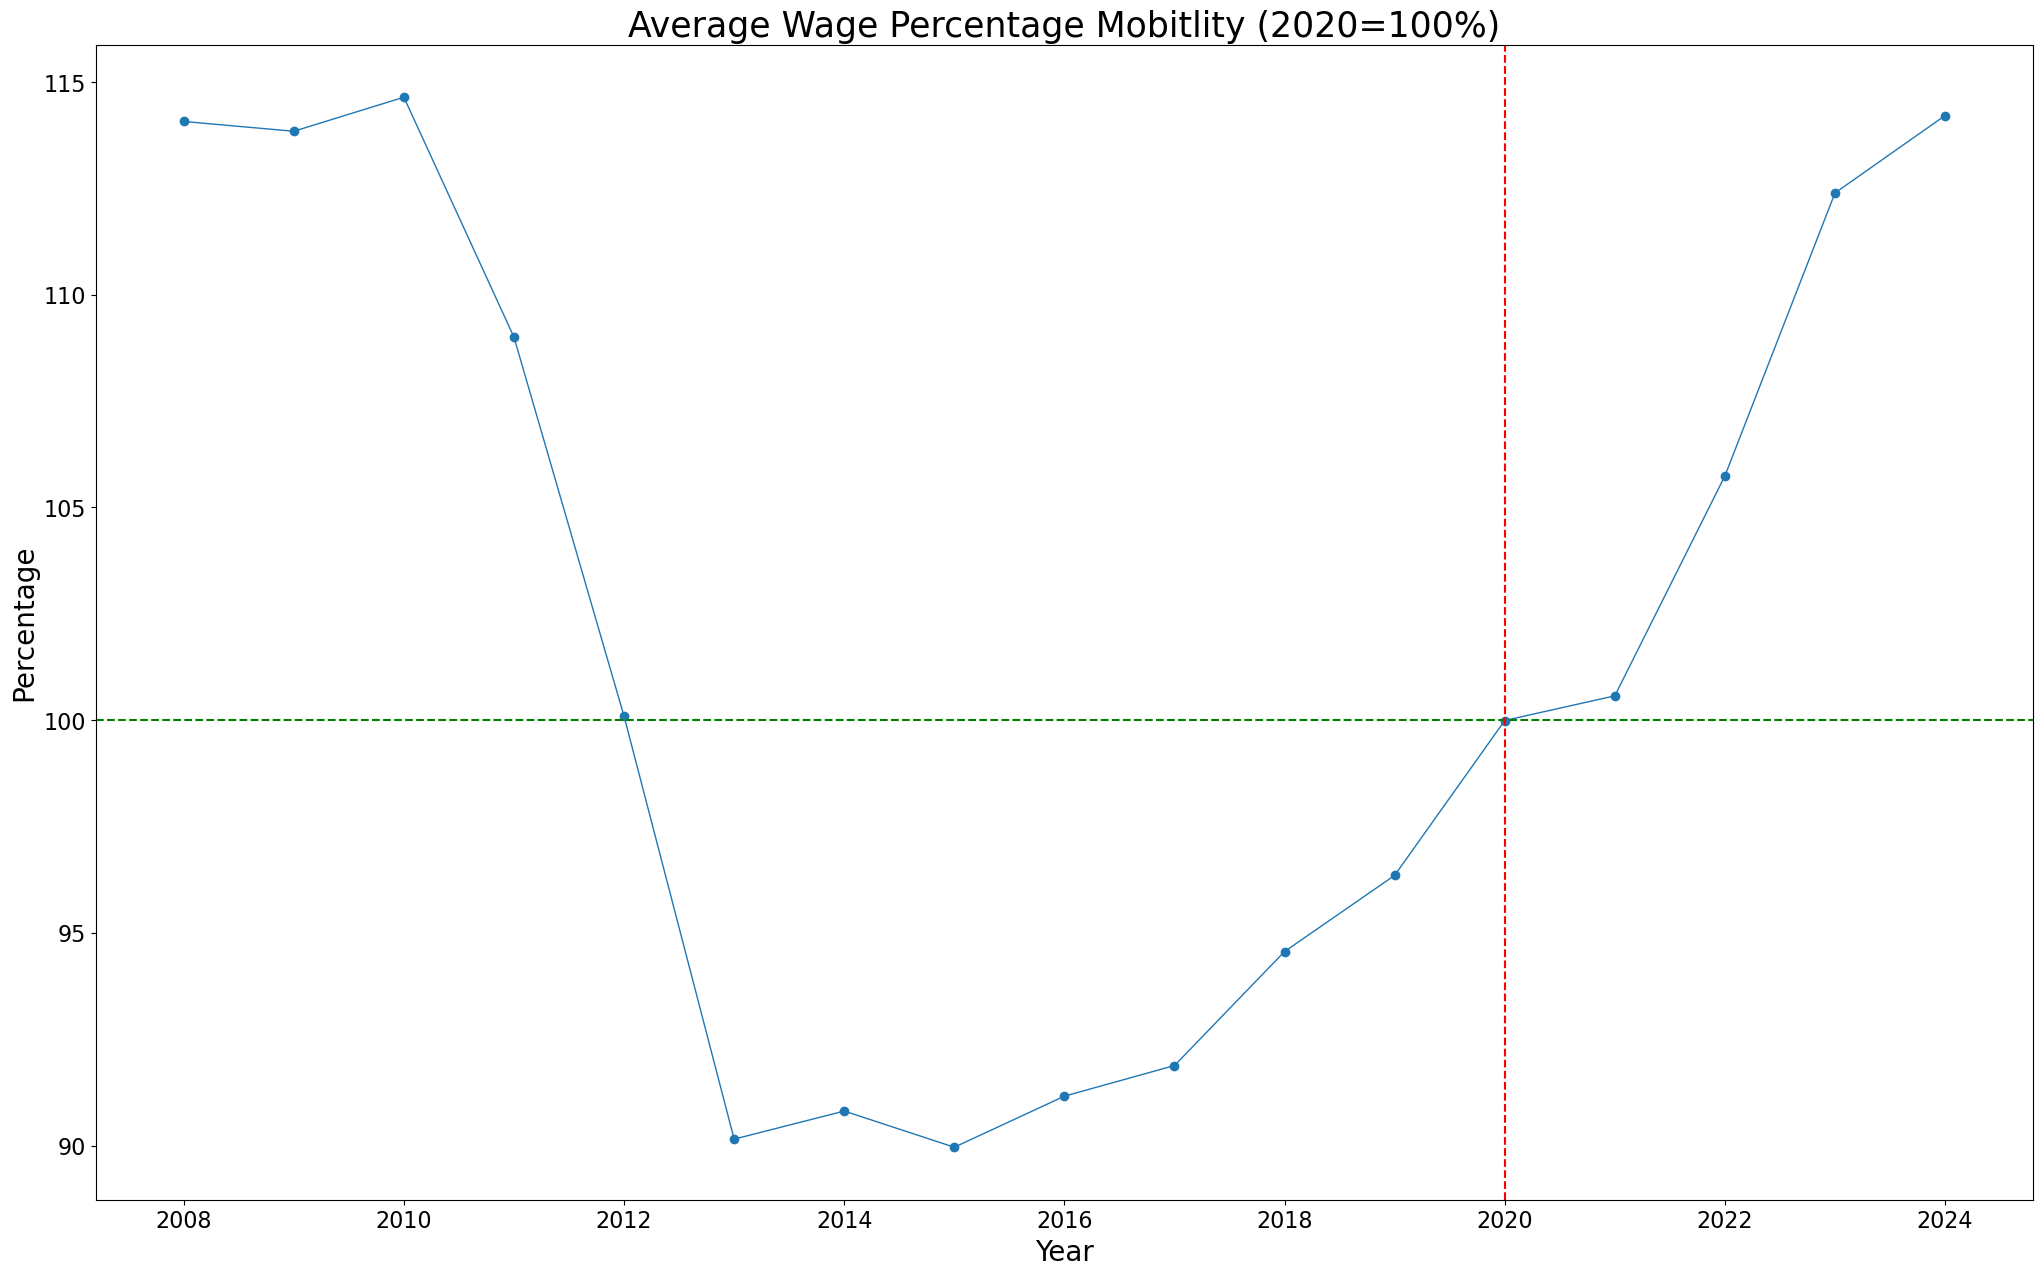

In [17]:
plt.figure(figsize=(25,15))

plt.plot(mean_wages_group.index, mean_wages_group['Average Index'], linewidth=1, marker='o')

plt.title('Average Wage Percentage Mobitlity (2020=100%)', fontsize=25 )

plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=16)

plt.ylabel('Percentage', fontsize=20)
plt.yticks(fontsize=16)

plt.axhline(y=100, color='green', linestyle='--')
plt.axvline(x=2020, color='red', linestyle='--')

plt.savefig('Average_wage_progression.png')
plt.show()

We see a great regression from minimum wage from 2008 2024 where minimum wage rethrned to pre recession values.
We also notice that the COVID19 pandemic set a one-year set back on this progression. 

At this point we must mention that the increases in wages from 2020 was merely almost 15% whereas the increases in many product prices was more than 50%.

Despite the economic factors pointing us to an economic growth during the past decade, the asymetric increases in prices and wages does not point us in the same direction.